# COGS 108 - Final Project 
(The Impact of Electric Vehicle Adoption on Pollution and Power Use in California)

# Video

**Watch the project video here:**  
[https://www.youtube.com/watch?v=WyB6L6t94-c](https://www.youtube.com/watch?v=WyB6L6t94-c)

# Names

- Jeremy Lin
- Abel Gonzalez-Hernandez
- Grace Hung
- Obert Sitiabudi

# Abstract

In this project, we explored the relationship between electric vehicle (EV) adoption and environmental outcomes across California counties from 2000 to 2023. Motivated by the growing push for cleaner transportation, we aimed to understand whether increased EV usage correlates with improved air quality and how it affects electricity demand. Using datasets from the California DMV, EPA air quality reports, and county-level electricity usage records, we conducted data cleaning, merging, and analysis across temporal and spatial dimensions. Our results show that higher EV adoption is generally associated with reductions in pollutants such as NO₂ and PM2.5, particularly in urban areas. However, we also observed a corresponding rise in electricity consumption, which may offset some environmental benefits depending on the local energy mix. These findings highlight the dual impact of EV adoption and the importance of a clean electricity grid in realizing the full benefits of electrified transport.

# Research Question

To what extent is the increase in electric vehicle (EV) adoption across California counties associated with (1) improvements in environmental quality, specifically through reductions in air pollutants and fine particulate matter, and (2) changes in electricity demand, particularly in regions with varying levels of EV penetration and different energy mixes?

## Background and Prior Work

California has committed to an ambitious climate goal: requiring 100% of new vehicle sales to be zero-emission by 2035<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1). This transition aims to reduce emissions from the transportation sector, which is the state's largest contributor to air pollution and greenhouse gases. While electric vehicles (EVs) offer the promise of cleaner air, their widespread adoption also brings new challenges, most notably, increased demand on the electrical grid. Understanding how this dual shift affects both air quality and electricity consumption at the county level is crucial for designing equitable environmental and energy policies across California’s diverse regions.

Recent research highlights the dual effects of California’s zero-emission vehicle (ZEV) transition. A study from CIRES found that full ZEV adoption by 2035 could significantly cut nitrogen oxide and carbon dioxide emissions, improving urban air quality and reducing ozone pollution<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). Meanwhile, a UC Davis report warns that rising EV demand could strain the electrical grid, requiring major infrastructure upgrades across 67% of circuits by 2045<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). These findings underscore the need for coordinated policies that balance environmental gains with grid readiness.

Climate change is often framed as a distant, future problem—but we believe it's a crisis happening now. Our goal is to challenge the idea that its impacts are only something younger generations will face later. Instead, we want to highlight how today’s choices, like adopting electric vehicles, are already influencing public health, environmental quality, and energy systems. If we can show that air pollution and energy strain are not just theoretical risks but measurable outcomes unfolding across California communities today, then the urgency to act becomes real and immediate. By exploring this question, we hope to offer a clearer perspective on why meaningful change must start now.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) California moves to accelerate to 100% new zero-emission vehicle sales by 2035. *California Air Resources Board*. https://ww2.arb.ca.gov/news/california-moves-accelerate-100-new-zero-emission-vehicle-sales-2035
2. <a name="cite_note-2"></a> [^](#cite_ref-2) ZEV Adoption Reduces Air Pollution and Climate Impact. *CIRES*. https://cires.colorado.edu/news/zero-emission-vehicle-adoption-reduces-air-pollution-climate-impact-transportation
3. <a name="cite_note-3"></a> [^](#cite_ref-3) New Study Forecasts EV Impact on CA’s Grid. *UC Davis*. https://energy.ucdavis.edu/new-study-forecasts-ev-impact-on-cas-grid/

# Hypothesis


We hypothesize that higher levels of electric vehicle (EV) adoption across California counties are associated with reductions in air pollutantsand fine particulate matter, particularly in densely populated urban areas. At the same time, we expect to observe increased electricity demand in counties with greater EV penetration, which may lead to secondary emissions depending on the local energy mix. While EVs reduce direct tailpipe emissions, we anticipate that in regions still reliant on fossil-fuel-based electricity, increased charging demand could offset some of the environmental benefits—especially during peak usage periods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [2]:
# function to lower case all the strings
def clean_column_names(df):
    df.columns = df.columns.astype(str).str.strip().str.lower()

    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype(str).str.strip().str.lower()
    
    return df

## CBSA Code Dataset

- Link to the dataset: https://data.nber.org/cbsa-csa-fips-county-crosswalk/cbsa2fipsxw.csv
- Number of observations: 3,274 observations
- Number of variables: 13 variables

This dataset provides a cross-reference between U.S. counties and their corresponding Core-Based Statistical Areas (CBSAs), as defined by the U.S. Census Bureau. In this project, it was used specifically to map California county names in the EV dataset to standardized CBSA codes and titles. This mapping enabled the alignment of county-level EV registration data with city-level air quality data for integrated regional analysis.

It was used to merge the air quality dataset with vehicle registration data by matching geographic identifiers. The dataset was relatively clean but still required column renaming and format alignment

In [3]:
cbsa_df = pd.read_csv("data/cbsa2fipsxw.csv")
cbsa_df

,cbsacode,metropolitandivisioncode,csacode,cbsatitle,metropolitanmicropolitanstatis,metropolitandivisiontitle,csatitle,countycountyequivalent,statename,fipsstatecode,fipscountycode,centraloutlyingcounty
0,33860,NaN,388.0,"Montgomery, AL",Metropolitan Statistical Area,NaN,"Montgomery-Selma, AL",Autauga County,Alabama,1,1,Central
1,19300,NaN,380.0,"Daphne-Fairhope-Foley, AL",Metropolitan Statistical Area,NaN,"Mobile-Daphne-Fairhope, AL",Baldwin County,Alabama,1,3,Central
2,21640,NaN,NaN,"Eufaula, AL-GA",Micropolitan Statistical Area,NaN,NaN,Barbour County,Alabama,1,5,Central
3,13820,NaN,142.0,"Birmingham, AL",Metropolitan Statistical Area,NaN,"Birmingham-Cullman-Talladega, AL",Bibb County,Alabama,1,7,Outlying
4,13820,NaN,142.0,"Birmingham, AL",Metropolitan Statistical Area,NaN,"Birmingham-Cullman-Talladega, AL",Blount County,Alabama,1,9,Outlying
...,...,...,...,...,...,...,...,...,...,...,...,...
1910,41980,NaN,490.0,"San Juan-Bayamón-Caguas, PR",Metropolitan Statistical Area,NaN,"San Juan-Bayamón, PR",Vega Alta Municipio,Puerto Rico,72,143,Central
1911,41980,NaN,490.0,"San Juan-Bayamón-Caguas, PR",Metropolitan Statistical Area,NaN,"San Juan-Bayamón, PR",Vega Baja Municipio,Puerto Rico,72,145,Central
1912,38660,NaN,434.0,"Ponce, PR",Metropolitan Statistical Area,NaN,"Ponce-Coamo, PR",Villalba Municipio,Puerto Rico,72,149,Outlying
1913,41980,NaN,490.0,"San Juan-Bayamón-Caguas, PR",Metropolitan Statistical Area,NaN,"San Juan-Bayamón, PR",Yabucoa Municipio,Puerto Rico,72,151,Central


In [4]:
# clean the crosswalk DataFrame
cbsa_df['countycountyequivalent'] = cbsa_df['countycountyequivalent'].str.lower().str.replace(" county", "").str.strip()
cbsa_df['statename'] = cbsa_df['statename'].str.lower().str.strip()

In [5]:
# filter CBSA to only california
cbsa_df = cbsa_df[cbsa_df['statename'] == 'california']

## California Car Dataset

  - Link to the dataset: https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data
  - Number of observations: 33,542 observations
  - Number of variables: 7 variables

This dataset from the California Energy Commission provides a detailed breakdown of light-duty vehicle registrations across California counties. It includes fuel types such as battery electric, diesel, gasoline, and hybrid, along with vehicle make, model, and counts per year. This data can help analyze electric vehicle adoption trends and compare fuel type distributions at the county level over time

The raw data required substantial cleaning: column names were standardized by stripping whitespace and converting them to lowercase for consistency. Some rows contained null values or totals across counties, which were dropped to retain only county-level data. Non-informative columns like make and model were also excluded, and categories like "battery electric," "fuel cell," and "plug-in hybrid" were grouped as EV-related types to simplify analysis. These steps ensured a clean, tidy dataset suitable for grouping and aggregating vehicle counts by fuel type and county over time.

In [6]:
county_df = pd.read_excel('data/Vehicle_Population_Last_updated_04-30-2025_ada.xlsx', sheet_name=1)
county_raw = county_df
county_df.head(10)

,Data Year,County,Dashboard Fuel Type Group,Fuel Type,Make,Model,Number of Vehicles
0,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Ford,Ranger,3
1,2010,Alameda,Battery Electric (BEV),Battery Electric (BEV),Tesla,Roadster,17
2,2010,Alameda,Diesel,Diesel,NaN,,10939
3,2010,Alameda,Gasoline,Flex Fuel,NaN,,10974
4,2010,Alameda,Gasoline,Gasoline,NaN,,840577
5,2010,Alameda,Gasoline Hybrid,Gasoline Hybrid,NaN,,22720
6,2010,Alameda,Other,Natural Gas,NaN,,173
7,2010,Alameda,Other,Propane,NaN,,19
8,2010,Alpine,Diesel,Diesel,NaN,,73
9,2010,Alpine,Gasoline,Flex Fuel,NaN,,16


In [7]:
# lower case all the strings to standarize them
county_df = clean_column_names(county_df)

# drop make and model since we are only evaluating the type of the vehicle
county_df = county_df.drop(columns=['make', 'model'], errors='ignore')

county_df.head()

,data year,county,dashboard fuel type group,fuel type,number of vehicles
0,2010,alameda,battery electric (bev),battery electric (bev),3
1,2010,alameda,battery electric (bev),battery electric (bev),17
2,2010,alameda,diesel,diesel,10939
3,2010,alameda,gasoline,flex fuel,10974
4,2010,alameda,gasoline,gasoline,840577


In [8]:
print('dashboard fuel type group:', county_df['dashboard fuel type group'].unique())
print('fuel type:', county_df['fuel type'].unique())

dashboard fuel type group: ['battery electric (bev)' 'diesel' 'gasoline' 'gasoline hybrid' 'other'
 'fuel cell (fcev)' 'plug-in hybrid (phev)']
fuel type: ['battery electric (bev)' 'diesel' 'flex fuel' 'gasoline'
 'gasoline hybrid' 'natural gas' 'propane' 'fuel cell (fcev)'
 'plug-in hybrid (phev)']


In [9]:
# group all the same category together
county_df = county_df.groupby(['data year', 'county', 'dashboard fuel type group', 'fuel type'], as_index=False)['number of vehicles'].sum()
county_df.head()

,data year,county,dashboard fuel type group,fuel type,number of vehicles
0,2010,alameda,battery electric (bev),battery electric (bev),20
1,2010,alameda,diesel,diesel,10939
2,2010,alameda,gasoline,flex fuel,10974
3,2010,alameda,gasoline,gasoline,840577
4,2010,alameda,gasoline hybrid,gasoline hybrid,22720


In [10]:
# renaming column
county_df = county_df.rename(columns={
    'dashboard fuel type group': 'vehicle type'
})

In [11]:
vehicle_type_df = county_df.pivot_table(
    index=['county', 'data year'],
    columns='vehicle type',
    values='number of vehicles',
    aggfunc='sum'
).reset_index()

fuel_type_df = county_df.pivot_table(
    index=['county', 'data year'],
    columns='fuel type',
    values='number of vehicles',
    aggfunc='sum'
).reset_index()

In [12]:
vehicle_type_df.head(10)

vehicle type,county,data year,battery electric (bev),diesel,fuel cell (fcev),gasoline,gasoline hybrid,other,plug-in hybrid (phev)
0,alameda,2010,20.0,10939.0,NaN,851551.0,22720.0,192.0,NaN
1,alameda,2011,299.0,11433.0,NaN,843444.0,24984.0,263.0,63.0
2,alameda,2012,555.0,12058.0,NaN,843660.0,28730.0,281.0,613.0
3,alameda,2013,1969.0,13087.0,NaN,869278.0,34632.0,325.0,1653.0
4,alameda,2014,4557.0,14397.0,NaN,889505.0,40790.0,332.0,3747.0
5,alameda,2015,7798.0,15289.0,NaN,901676.0,45239.0,362.0,5399.0
6,alameda,2016,10881.0,15773.0,25.0,930458.0,50750.0,339.0,7235.0
7,alameda,2017,14477.0,15663.0,169.0,1034564.0,60449.0,385.0,10287.0
8,alameda,2018,20421.0,15721.0,343.0,1031730.0,63355.0,337.0,13994.0
9,alameda,2019,26372.0,15924.0,436.0,1027288.0,66895.0,328.0,16115.0


In [13]:
fuel_type_df.head(10)

fuel type,county,data year,battery electric (bev),diesel,flex fuel,fuel cell (fcev),gasoline,gasoline hybrid,natural gas,plug-in hybrid (phev),propane
0,alameda,2010,20.0,10939.0,10974.0,NaN,840577.0,22720.0,173.0,NaN,19.0
1,alameda,2011,299.0,11433.0,12765.0,NaN,830679.0,24984.0,244.0,63.0,19.0
2,alameda,2012,555.0,12058.0,14692.0,NaN,828968.0,28730.0,262.0,613.0,19.0
3,alameda,2013,1969.0,13087.0,17713.0,NaN,851565.0,34632.0,296.0,1653.0,29.0
4,alameda,2014,4557.0,14397.0,21269.0,NaN,868236.0,40790.0,306.0,3747.0,26.0
5,alameda,2015,7798.0,15289.0,23889.0,NaN,877787.0,45239.0,335.0,5399.0,27.0
6,alameda,2016,10881.0,15773.0,26692.0,25.0,903766.0,50750.0,310.0,7235.0,29.0
7,alameda,2017,14477.0,15663.0,31131.0,169.0,1003433.0,60449.0,352.0,10287.0,33.0
8,alameda,2018,20421.0,15721.0,31952.0,343.0,999778.0,63355.0,308.0,13994.0,29.0
9,alameda,2019,26372.0,15924.0,32169.0,436.0,995119.0,66895.0,299.0,16115.0,29.0


In [14]:
vehicle_type_df.isna().sum()

vehicle type
county                      0
data year                   0
battery electric (bev)     69
diesel                      0
fuel cell (fcev)          553
gasoline                    0
gasoline hybrid             0
other                      87
plug-in hybrid (phev)      83
dtype: int64

In [15]:
fuel_type_df.isna().sum()

fuel type
county                      0
data year                   0
battery electric (bev)     69
diesel                      0
flex fuel                   0
fuel cell (fcev)          553
gasoline                    0
gasoline hybrid             0
natural gas               131
plug-in hybrid (phev)      83
propane                   269
dtype: int64

In [16]:
vehicle_type_df = vehicle_type_df.fillna(0)
fuel_type_df = fuel_type_df.fillna(0)

In [17]:
vehicle_type_df = vehicle_type_df.rename(columns={
    'battery electric (bev)': 'bev',
    'fuel cell (fcev)': 'fcev',
    'plug-in hybrid (phev)': 'phev',
})

fuel_type_df = fuel_type_df.rename(columns={
    'battery electric (bev)': 'bev',
    'fuel cell (fcev)': 'fcev',
    'plug-in hybrid (phev)': 'phev',
})

In [18]:
vehicle_type_df.head(10)

vehicle type,county,data year,bev,diesel,fcev,gasoline,gasoline hybrid,other,phev
0,alameda,2010,20.0,10939.0,0.0,851551.0,22720.0,192.0,0.0
1,alameda,2011,299.0,11433.0,0.0,843444.0,24984.0,263.0,63.0
2,alameda,2012,555.0,12058.0,0.0,843660.0,28730.0,281.0,613.0
3,alameda,2013,1969.0,13087.0,0.0,869278.0,34632.0,325.0,1653.0
4,alameda,2014,4557.0,14397.0,0.0,889505.0,40790.0,332.0,3747.0
5,alameda,2015,7798.0,15289.0,0.0,901676.0,45239.0,362.0,5399.0
6,alameda,2016,10881.0,15773.0,25.0,930458.0,50750.0,339.0,7235.0
7,alameda,2017,14477.0,15663.0,169.0,1034564.0,60449.0,385.0,10287.0
8,alameda,2018,20421.0,15721.0,343.0,1031730.0,63355.0,337.0,13994.0
9,alameda,2019,26372.0,15924.0,436.0,1027288.0,66895.0,328.0,16115.0


In [19]:
fuel_type_df.head(10)

fuel type,county,data year,bev,diesel,flex fuel,fcev,gasoline,gasoline hybrid,natural gas,phev,propane
0,alameda,2010,20.0,10939.0,10974.0,0.0,840577.0,22720.0,173.0,0.0,19.0
1,alameda,2011,299.0,11433.0,12765.0,0.0,830679.0,24984.0,244.0,63.0,19.0
2,alameda,2012,555.0,12058.0,14692.0,0.0,828968.0,28730.0,262.0,613.0,19.0
3,alameda,2013,1969.0,13087.0,17713.0,0.0,851565.0,34632.0,296.0,1653.0,29.0
4,alameda,2014,4557.0,14397.0,21269.0,0.0,868236.0,40790.0,306.0,3747.0,26.0
5,alameda,2015,7798.0,15289.0,23889.0,0.0,877787.0,45239.0,335.0,5399.0,27.0
6,alameda,2016,10881.0,15773.0,26692.0,25.0,903766.0,50750.0,310.0,7235.0,29.0
7,alameda,2017,14477.0,15663.0,31131.0,169.0,1003433.0,60449.0,352.0,10287.0,33.0
8,alameda,2018,20421.0,15721.0,31952.0,343.0,999778.0,63355.0,308.0,13994.0,29.0
9,alameda,2019,26372.0,15924.0,32169.0,436.0,995119.0,66895.0,299.0,16115.0,29.0


In [20]:
vehicle_type_df = pd.merge(
    vehicle_type_df,
    cbsa_df[['countycountyequivalent', 'cbsacode', 'cbsatitle']],
    left_on='county',
    right_on='countycountyequivalent',
    how='left'
)

In [21]:
# see unmatched county
vehicle_type_df[vehicle_type_df['cbsacode'].isna()]['county'].unique()

array(['amador', 'calaveras', 'colusa', 'glenn', 'mariposa', 'modoc',
       'mono', 'out of state', 'plumas', 'sierra', 'siskiyou', 'trinity'],
      dtype=object)

In [22]:
vehicle_type_df.loc[vehicle_type_df['cbsacode'].isna(), 'cbsacode'] = 99999
vehicle_type_df.loc[vehicle_type_df['cbsacode'].isna(), 'cbsatitle'] = 'other, CA'

In [23]:
column_order = [
    'county', 'cbsacode', 'cbsatitle', 'data year', 'bev', 'fcev', 'phev', 'diesel', 
    'gasoline', 'gasoline hybrid', 'other'
]

vehicle_type_df = vehicle_type_df.drop(columns=['countycountyequivalent'])
vehicle_type_df = vehicle_type_df[column_order]
vehicle_type_df

,county,cbsacode,cbsatitle,data year,bev,fcev,phev,diesel,gasoline,gasoline hybrid,other
0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2010,20.0,0.0,0.0,10939.0,851551.0,22720.0,192.0
1,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2011,299.0,0.0,63.0,11433.0,843444.0,24984.0,263.0
2,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2012,555.0,0.0,613.0,12058.0,843660.0,28730.0,281.0
3,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2013,1969.0,0.0,1653.0,13087.0,869278.0,34632.0,325.0
4,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2014,4557.0,0.0,3747.0,14397.0,889505.0,40790.0,332.0
...,...,...,...,...,...,...,...,...,...,...,...
880,yuba,49700.0,"Yuba City, CA",2020,132.0,2.0,157.0,3228.0,49822.0,1288.0,8.0
881,yuba,49700.0,"Yuba City, CA",2021,232.0,0.0,225.0,2734.0,53566.0,1562.0,7.0
882,yuba,49700.0,"Yuba City, CA",2022,416.0,3.0,270.0,2735.0,51692.0,1757.0,6.0
883,yuba,49700.0,"Yuba City, CA",2023,630.0,3.0,328.0,2831.0,52645.0,2087.0,4.0


In [24]:
vehicle_type_df = clean_column_names(vehicle_type_df)
vehicle_type_df.head(10)

,county,cbsacode,cbsatitle,data year,bev,fcev,phev,diesel,gasoline,gasoline hybrid,other
0,alameda,41860.0,"san francisco-oakland-fremont, ca",2010,20.0,0.0,0.0,10939.0,851551.0,22720.0,192.0
1,alameda,41860.0,"san francisco-oakland-fremont, ca",2011,299.0,0.0,63.0,11433.0,843444.0,24984.0,263.0
2,alameda,41860.0,"san francisco-oakland-fremont, ca",2012,555.0,0.0,613.0,12058.0,843660.0,28730.0,281.0
3,alameda,41860.0,"san francisco-oakland-fremont, ca",2013,1969.0,0.0,1653.0,13087.0,869278.0,34632.0,325.0
4,alameda,41860.0,"san francisco-oakland-fremont, ca",2014,4557.0,0.0,3747.0,14397.0,889505.0,40790.0,332.0
5,alameda,41860.0,"san francisco-oakland-fremont, ca",2015,7798.0,0.0,5399.0,15289.0,901676.0,45239.0,362.0
6,alameda,41860.0,"san francisco-oakland-fremont, ca",2016,10881.0,25.0,7235.0,15773.0,930458.0,50750.0,339.0
7,alameda,41860.0,"san francisco-oakland-fremont, ca",2017,14477.0,169.0,10287.0,15663.0,1034564.0,60449.0,385.0
8,alameda,41860.0,"san francisco-oakland-fremont, ca",2018,20421.0,343.0,13994.0,15721.0,1031730.0,63355.0,337.0
9,alameda,41860.0,"san francisco-oakland-fremont, ca",2019,26372.0,436.0,16115.0,15924.0,1027288.0,66895.0,328.0


In [25]:
fuel_type_df = pd.merge(
    fuel_type_df,
    cbsa_df[['countycountyequivalent', 'cbsacode', 'cbsatitle']],
    left_on='county',
    right_on='countycountyequivalent',
    how='left'
)

fuel_type_df.loc[fuel_type_df['cbsacode'].isna(), 'cbsacode'] = 99999
fuel_type_df.loc[fuel_type_df['cbsacode'].isna(), 'cbsatitle'] = 'other, CA'

fuel_type_df.head(10)

,county,data year,bev,diesel,flex fuel,fcev,gasoline,gasoline hybrid,natural gas,phev,propane,countycountyequivalent,cbsacode,cbsatitle
0,alameda,2010,20.0,10939.0,10974.0,0.0,840577.0,22720.0,173.0,0.0,19.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
1,alameda,2011,299.0,11433.0,12765.0,0.0,830679.0,24984.0,244.0,63.0,19.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
2,alameda,2012,555.0,12058.0,14692.0,0.0,828968.0,28730.0,262.0,613.0,19.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
3,alameda,2013,1969.0,13087.0,17713.0,0.0,851565.0,34632.0,296.0,1653.0,29.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
4,alameda,2014,4557.0,14397.0,21269.0,0.0,868236.0,40790.0,306.0,3747.0,26.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
5,alameda,2015,7798.0,15289.0,23889.0,0.0,877787.0,45239.0,335.0,5399.0,27.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
6,alameda,2016,10881.0,15773.0,26692.0,25.0,903766.0,50750.0,310.0,7235.0,29.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
7,alameda,2017,14477.0,15663.0,31131.0,169.0,1003433.0,60449.0,352.0,10287.0,33.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
8,alameda,2018,20421.0,15721.0,31952.0,343.0,999778.0,63355.0,308.0,13994.0,29.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"
9,alameda,2019,26372.0,15924.0,32169.0,436.0,995119.0,66895.0,299.0,16115.0,29.0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA"


In [26]:
column_order = [
    'county', 'cbsacode', 'cbsatitle', 'data year', 'bev', 'fcev', 'phev', 'diesel', 
    'gasoline', 'gasoline hybrid', 'propane'
]

fuel_type_df = fuel_type_df.drop(columns=['countycountyequivalent'])
fuel_type_df = fuel_type_df[column_order]
fuel_type_df

,county,cbsacode,cbsatitle,data year,bev,fcev,phev,diesel,gasoline,gasoline hybrid,propane
0,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2010,20.0,0.0,0.0,10939.0,840577.0,22720.0,19.0
1,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2011,299.0,0.0,63.0,11433.0,830679.0,24984.0,19.0
2,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2012,555.0,0.0,613.0,12058.0,828968.0,28730.0,19.0
3,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2013,1969.0,0.0,1653.0,13087.0,851565.0,34632.0,29.0
4,alameda,41860.0,"San Francisco-Oakland-Fremont, CA",2014,4557.0,0.0,3747.0,14397.0,868236.0,40790.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
880,yuba,49700.0,"Yuba City, CA",2020,132.0,2.0,157.0,3228.0,46887.0,1288.0,3.0
881,yuba,49700.0,"Yuba City, CA",2021,232.0,0.0,225.0,2734.0,50112.0,1562.0,0.0
882,yuba,49700.0,"Yuba City, CA",2022,416.0,3.0,270.0,2735.0,48370.0,1757.0,0.0
883,yuba,49700.0,"Yuba City, CA",2023,630.0,3.0,328.0,2831.0,49324.0,2087.0,0.0


In [27]:
vehicle_type_df = clean_column_names(vehicle_type_df)
vehicle_type_df.head(10)

,county,cbsacode,cbsatitle,data year,bev,fcev,phev,diesel,gasoline,gasoline hybrid,other
0,alameda,41860.0,"san francisco-oakland-fremont, ca",2010,20.0,0.0,0.0,10939.0,851551.0,22720.0,192.0
1,alameda,41860.0,"san francisco-oakland-fremont, ca",2011,299.0,0.0,63.0,11433.0,843444.0,24984.0,263.0
2,alameda,41860.0,"san francisco-oakland-fremont, ca",2012,555.0,0.0,613.0,12058.0,843660.0,28730.0,281.0
3,alameda,41860.0,"san francisco-oakland-fremont, ca",2013,1969.0,0.0,1653.0,13087.0,869278.0,34632.0,325.0
4,alameda,41860.0,"san francisco-oakland-fremont, ca",2014,4557.0,0.0,3747.0,14397.0,889505.0,40790.0,332.0
5,alameda,41860.0,"san francisco-oakland-fremont, ca",2015,7798.0,0.0,5399.0,15289.0,901676.0,45239.0,362.0
6,alameda,41860.0,"san francisco-oakland-fremont, ca",2016,10881.0,25.0,7235.0,15773.0,930458.0,50750.0,339.0
7,alameda,41860.0,"san francisco-oakland-fremont, ca",2017,14477.0,169.0,10287.0,15663.0,1034564.0,60449.0,385.0
8,alameda,41860.0,"san francisco-oakland-fremont, ca",2018,20421.0,343.0,13994.0,15721.0,1031730.0,63355.0,337.0
9,alameda,41860.0,"san francisco-oakland-fremont, ca",2019,26372.0,436.0,16115.0,15924.0,1027288.0,66895.0,328.0


In [28]:
print("\n=== Vehicle Data Before Cleaning ===")
print(county_raw.describe(include='all'))
print("\n=== Vehicle Data After Cleaning ===")
print(vehicle_type_df.describe(include='all'))
print(fuel_type_df.describe(include='all'))


=== Vehicle Data Before Cleaning ===
           data year       county dashboard fuel type group  \
count   40877.000000        40877                     40877   
unique           NaN           59                         7   
top              NaN  los angeles     plug-in hybrid (phev)   
freq             NaN         1181                     18036   
mean     2020.177190          NaN                       NaN   
std         3.514427          NaN                       NaN   
min      2010.000000          NaN                       NaN   
25%      2018.000000          NaN                       NaN   
50%      2021.000000          NaN                       NaN   
75%      2023.000000          NaN                       NaN   
max      2024.000000          NaN                       NaN   

                    fuel type   make  model  number of vehicles  
count                   40877  40877  40877        4.087700e+04  
unique                      9     56    217                 NaN  
top    

## California Air Quality Dataset

  - Link to the dataset: https://www.epa.gov/system/files/documents/2024-08/airqualitytrendsbycity2000-2023.xlsx
  - Number of observations: 1,031 observations
  - Number of variables: 29 variables

This dataset tracks air quality trends from 2000 to 2023 across U.S. metropolitan areas defined by Core Based Statistical Areas (CBSA). Each row represents a pollutant measurement type (e.g., 4th max ozone level, annual PM2.5 mean) for a specific CBSA. It includes values for each year and notes areas where EPA data may be unreliable.

The dataset required data cleaning such as column renaming (to remove spaces and standardize lowercase), trimming string fields, and converting CBSA codes to integers for join compatibility. Object-type columns were also stripped of extra whitespace and lowercased. We checked for missing values and ensured all year values were in valid range. Since the dataset is structured in a tidy format, minimal reshaping was needed, but merging with external CBSA–FIPS mappings required consistent formatting of geographic identifiers. This cleaned air quality data supports temporal analysis of pollution trends in relation to EV growth.

In [29]:
air_df = pd.read_excel('data/airquality.xlsx')
air_df = air_df.iloc[2:]
air_df.columns = air_df.iloc[0]
air_df = air_df.iloc[1:].reset_index(drop=True)
air_raw = air_df
air_df

2,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trends Sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,10300,"Adrian, MI",O3,4th Max,1,0.082,0.086,0.089,0.088,0.074,...,0.068,0.065,0.069,0.066,0.071,0.059,0.067,0.066,0.065,0.071
1,10420,"Akron, OH",O3,4th Max,2,0.085,0.096,0.100,0.090,0.079,...,0.060,0.065,0.060,0.066,0.068,0.062,0.063,0.067,0.070,0.071
2,10420,NaN,PM2.5,Weighted Annual Mean,3,16.200,16.200,16.000,14.100,13.800,...,9.900,10.400,8.200,7.900,7.900,8.200,7.900,8.000,7.100,7.500
3,10420,NaN,PM2.5,98th Percentile,3,37.000,44.000,40.000,34.000,35.000,...,22.000,23.000,17.000,18.000,18.000,21.000,21.000,20.000,17.000,20.000
4,10420,NaN,SO2,99th Percentile,1,163.000,132.000,145.000,167.000,172.000,...,21.000,14.000,8.000,3.000,6.000,3.000,4.000,5.000,6.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,O3 4th Max - Fourth highest daily maximum 8...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024,PM10 2nd Max - Second maximum 24-hour concent...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1025,PM2.5 Weighted Annual Mean - Weighted annua...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1026,PM2.5 98th Percentile - 98th percentile of ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
air_df = air_df.dropna(subset=['Pollutant', 'Trend Statistic'])
air_df

2,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trends Sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,10300,"Adrian, MI",O3,4th Max,1,0.082,0.086,0.089,0.088,0.074,...,0.068,0.065,0.069,0.066,0.071,0.059,0.067,0.066,0.065,0.071
1,10420,"Akron, OH",O3,4th Max,2,0.085,0.096,0.100,0.090,0.079,...,0.060,0.065,0.060,0.066,0.068,0.062,0.063,0.067,0.070,0.071
2,10420,NaN,PM2.5,Weighted Annual Mean,3,16.200,16.200,16.000,14.100,13.800,...,9.900,10.400,8.200,7.900,7.900,8.200,7.900,8.000,7.100,7.500
3,10420,NaN,PM2.5,98th Percentile,3,37.000,44.000,40.000,34.000,35.000,...,22.000,23.000,17.000,18.000,18.000,21.000,21.000,20.000,17.000,20.000
4,10420,NaN,SO2,99th Percentile,1,163.000,132.000,145.000,167.000,172.000,...,21.000,14.000,8.000,3.000,6.000,3.000,4.000,5.000,6.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,49700,"Yuba City, CA",NO2,Annual Mean,1,13.000,14.000,15.000,14.000,12.000,...,8.000,7.000,7.000,7.000,7.000,6.000,6.000,5.000,7.000,6.000
1014,49700,NaN,NO2,98th Percentile,1,62.000,62.000,62.000,62.000,52.000,...,44.000,39.000,40.000,42.000,41.000,40.000,38.000,34.000,37.000,33.000
1015,49700,NaN,O3,4th Max,2,0.081,0.077,0.090,0.085,0.076,...,0.072,0.068,0.072,0.074,0.073,0.063,0.075,0.075,0.064,0.064
1016,49700,NaN,PM2.5,Weighted Annual Mean,1,10.600,11.900,13.100,9.500,10.000,...,9.400,9.600,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400


In [31]:
air_df['Core Based Statistical Area'] = air_df['Core Based Statistical Area'].copy().ffill()
air_df

/var/folders/41/793_8z310jncd8z5jhvqvpch0000gn/T/ipykernel_66883/2200648823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['Core Based Statistical Area'] = air_df['Core Based Statistical Area'].copy().ffill()


2,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trends Sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,10300,"Adrian, MI",O3,4th Max,1,0.082,0.086,0.089,0.088,0.074,...,0.068,0.065,0.069,0.066,0.071,0.059,0.067,0.066,0.065,0.071
1,10420,"Akron, OH",O3,4th Max,2,0.085,0.096,0.100,0.090,0.079,...,0.060,0.065,0.060,0.066,0.068,0.062,0.063,0.067,0.070,0.071
2,10420,"Akron, OH",PM2.5,Weighted Annual Mean,3,16.200,16.200,16.000,14.100,13.800,...,9.900,10.400,8.200,7.900,7.900,8.200,7.900,8.000,7.100,7.500
3,10420,"Akron, OH",PM2.5,98th Percentile,3,37.000,44.000,40.000,34.000,35.000,...,22.000,23.000,17.000,18.000,18.000,21.000,21.000,20.000,17.000,20.000
4,10420,"Akron, OH",SO2,99th Percentile,1,163.000,132.000,145.000,167.000,172.000,...,21.000,14.000,8.000,3.000,6.000,3.000,4.000,5.000,6.000,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,49700,"Yuba City, CA",NO2,Annual Mean,1,13.000,14.000,15.000,14.000,12.000,...,8.000,7.000,7.000,7.000,7.000,6.000,6.000,5.000,7.000,6.000
1014,49700,"Yuba City, CA",NO2,98th Percentile,1,62.000,62.000,62.000,62.000,52.000,...,44.000,39.000,40.000,42.000,41.000,40.000,38.000,34.000,37.000,33.000
1015,49700,"Yuba City, CA",O3,4th Max,2,0.081,0.077,0.090,0.085,0.076,...,0.072,0.068,0.072,0.074,0.073,0.063,0.075,0.075,0.064,0.064
1016,49700,"Yuba City, CA",PM2.5,Weighted Annual Mean,1,10.600,11.900,13.100,9.500,10.000,...,9.400,9.600,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400


In [32]:
air_df = air_df[air_df['Core Based Statistical Area'].str.endswith(', CA')].copy()
air_df.reset_index(drop=True, inplace=True)
air_df

2,CBSA,Core Based Statistical Area,Pollutant,Trend Statistic,Number of Trends Sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,12540,"Bakersfield, CA",NO2,Annual Mean,3,18.000,18.000,17.000,17.000,16.000,...,10.000,9.000,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000
1,12540,"Bakersfield, CA",NO2,98th Percentile,3,61.000,69.000,64.000,62.000,56.000,...,44.000,40.000,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000
2,12540,"Bakersfield, CA",O3,4th Max,6,0.098,0.099,0.102,0.099,0.089,...,0.083,0.084,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078
3,12540,"Bakersfield, CA",PM2.5,Weighted Annual Mean,2,21.400,21.000,23.100,17.500,18.100,...,20.100,17.100,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200
4,12540,"Bakersfield, CA",PM2.5,98th Percentile,2,85.000,93.000,70.000,48.000,55.000,...,78.000,57.000,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,49700,"Yuba City, CA",NO2,Annual Mean,1,13.000,14.000,15.000,14.000,12.000,...,8.000,7.000,7.000,7.000,7.000,6.000,6.000,5.000,7.000,6.000
130,49700,"Yuba City, CA",NO2,98th Percentile,1,62.000,62.000,62.000,62.000,52.000,...,44.000,39.000,40.000,42.000,41.000,40.000,38.000,34.000,37.000,33.000
131,49700,"Yuba City, CA",O3,4th Max,2,0.081,0.077,0.090,0.085,0.076,...,0.072,0.068,0.072,0.074,0.073,0.063,0.075,0.075,0.064,0.064
132,49700,"Yuba City, CA",PM2.5,Weighted Annual Mean,1,10.600,11.900,13.100,9.500,10.000,...,9.400,9.600,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400


In [33]:
air_df = clean_column_names(air_df)
air_df

2,cbsa,core based statistical area,pollutant,trend statistic,number of trends sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,12540,"bakersfield, ca",no2,annual mean,3,18.000,18.000,17.000,17.000,16.000,...,10.000,9.000,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000
1,12540,"bakersfield, ca",no2,98th percentile,3,61.000,69.000,64.000,62.000,56.000,...,44.000,40.000,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000
2,12540,"bakersfield, ca",o3,4th max,6,0.098,0.099,0.102,0.099,0.089,...,0.083,0.084,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078
3,12540,"bakersfield, ca",pm2.5,weighted annual mean,2,21.400,21.000,23.100,17.500,18.100,...,20.100,17.100,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200
4,12540,"bakersfield, ca",pm2.5,98th percentile,2,85.000,93.000,70.000,48.000,55.000,...,78.000,57.000,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,49700,"yuba city, ca",no2,annual mean,1,13.000,14.000,15.000,14.000,12.000,...,8.000,7.000,7.000,7.000,7.000,6.000,6.000,5.000,7.000,6.000
130,49700,"yuba city, ca",no2,98th percentile,1,62.000,62.000,62.000,62.000,52.000,...,44.000,39.000,40.000,42.000,41.000,40.000,38.000,34.000,37.000,33.000
131,49700,"yuba city, ca",o3,4th max,2,0.081,0.077,0.090,0.085,0.076,...,0.072,0.068,0.072,0.074,0.073,0.063,0.075,0.075,0.064,0.064
132,49700,"yuba city, ca",pm2.5,weighted annual mean,1,10.600,11.900,13.100,9.500,10.000,...,9.400,9.600,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400


In [34]:
air_df.dtypes

2
cbsa                            object
core based statistical area     object
pollutant                       object
trend statistic                 object
number of trends sites          object
2000.0                         float64
2001.0                         float64
2002.0                         float64
2003.0                         float64
2004.0                         float64
2005.0                         float64
2006.0                         float64
2007.0                         float64
2008.0                         float64
2009.0                         float64
2010.0                         float64
2011.0                         float64
2012.0                         float64
2013.0                         float64
2014.0                         float64
2015.0                         float64
2016.0                         float64
2017.0                         float64
2018.0                         float64
2019.0                         float64
2020.0                 

In [35]:
air_df['cbsa'] = air_df['cbsa'].astype('int64')

In [36]:
air_df.dtypes

2
cbsa                             int64
core based statistical area     object
pollutant                       object
trend statistic                 object
number of trends sites          object
2000.0                         float64
2001.0                         float64
2002.0                         float64
2003.0                         float64
2004.0                         float64
2005.0                         float64
2006.0                         float64
2007.0                         float64
2008.0                         float64
2009.0                         float64
2010.0                         float64
2011.0                         float64
2012.0                         float64
2013.0                         float64
2014.0                         float64
2015.0                         float64
2016.0                         float64
2017.0                         float64
2018.0                         float64
2019.0                         float64
2020.0                 

In [37]:
air_df = pd.merge(
    air_df,
    cbsa_df[['cbsacode', 'cbsatitle']],
    left_on='cbsa',
    right_on='cbsacode',
    how='left'
)

air_df

,cbsa,core based statistical area,pollutant,trend statistic,number of trends sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,cbsacode,cbsatitle
0,12540,"bakersfield, ca",no2,annual mean,3,18.000,18.000,17.000,17.000,16.000,...,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000,12540.0,"Bakersfield-Delano, CA"
1,12540,"bakersfield, ca",no2,98th percentile,3,61.000,69.000,64.000,62.000,56.000,...,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000,12540.0,"Bakersfield-Delano, CA"
2,12540,"bakersfield, ca",o3,4th max,6,0.098,0.099,0.102,0.099,0.089,...,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078,12540.0,"Bakersfield-Delano, CA"
3,12540,"bakersfield, ca",pm2.5,weighted annual mean,2,21.400,21.000,23.100,17.500,18.100,...,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200,12540.0,"Bakersfield-Delano, CA"
4,12540,"bakersfield, ca",pm2.5,98th percentile,2,85.000,93.000,70.000,48.000,55.000,...,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000,12540.0,"Bakersfield-Delano, CA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,49700,"yuba city, ca",o3,4th max,2,0.081,0.077,0.090,0.085,0.076,...,0.072,0.074,0.073,0.063,0.075,0.075,0.064,0.064,49700.0,"Yuba City, CA"
211,49700,"yuba city, ca",pm2.5,weighted annual mean,1,10.600,11.900,13.100,9.500,10.000,...,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400,49700.0,"Yuba City, CA"
212,49700,"yuba city, ca",pm2.5,weighted annual mean,1,10.600,11.900,13.100,9.500,10.000,...,8.100,9.300,10.300,8.400,16.400,14.500,10.700,8.400,49700.0,"Yuba City, CA"
213,49700,"yuba city, ca",pm2.5,98th percentile,1,38.000,54.000,34.000,29.000,38.000,...,22.000,32.000,37.000,27.000,91.000,45.000,28.000,24.000,49700.0,"Yuba City, CA"


In [38]:
air_df[air_df['cbsacode'].isna()]['cbsatitle'].unique()

array([nan], dtype=object)

In [39]:
cols = list(air_df.columns)
i, j = cols.index('core based statistical area'), cols.index('cbsatitle')
cols[i], cols[j] = cols[j], cols[i]
i, j = cols.index('cbsa'), cols.index('cbsacode')
cols[i], cols[j] = cols[j], cols[i]
air_df = air_df[cols]
air_df.head(10)

,cbsacode,cbsatitle,pollutant,trend statistic,number of trends sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0,cbsa,core based statistical area
0,12540.0,"Bakersfield-Delano, CA",no2,annual mean,3,18.000,18.000,17.000,17.000,16.000,...,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000,12540,"bakersfield, ca"
1,12540.0,"Bakersfield-Delano, CA",no2,98th percentile,3,61.000,69.000,64.000,62.000,56.000,...,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000,12540,"bakersfield, ca"
2,12540.0,"Bakersfield-Delano, CA",o3,4th max,6,0.098,0.099,0.102,0.099,0.089,...,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078,12540,"bakersfield, ca"
3,12540.0,"Bakersfield-Delano, CA",pm2.5,weighted annual mean,2,21.400,21.000,23.100,17.500,18.100,...,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200,12540,"bakersfield, ca"
4,12540.0,"Bakersfield-Delano, CA",pm2.5,98th percentile,2,85.000,93.000,70.000,48.000,55.000,...,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000,12540,"bakersfield, ca"
5,13860.0,"Bishop, CA",pm10,2nd max,4,2128.300,3282.300,1894.500,2565.000,1714.800,...,206.000,478.000,179.500,166.300,356.000,181.000,310.500,331.000,13860,"bishop, ca"
6,13860.0,"Bishop, CA",pm2.5,weighted annual mean,1,5.500,5.500,8.200,4.900,5.200,...,6.600,8.000,7.000,5.200,10.400,9.700,6.200,6.400,13860,"bishop, ca"
7,13860.0,"Bishop, CA",pm2.5,98th percentile,1,23.000,23.000,62.000,15.000,22.000,...,25.000,37.000,25.000,16.000,67.000,58.000,26.000,18.000,13860,"bishop, ca"
8,17020.0,"Chico, CA",o3,4th max,2,0.083,0.084,0.088,0.080,0.077,...,0.072,0.072,0.073,0.062,0.069,0.071,0.067,0.065,17020,"chico, ca"
9,17340.0,"Clearlake, CA",o3,4th max,1,0.062,0.060,0.072,0.061,0.062,...,0.057,0.058,0.053,0.051,0.059,0.054,0.053,0.048,17340,"clearlake, ca"


In [40]:
air_df = air_df.drop(columns=['cbsa', 'core based statistical area'])
air_df.head(10)

,cbsacode,cbsatitle,pollutant,trend statistic,number of trends sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,12540.0,"Bakersfield-Delano, CA",no2,annual mean,3,18.000,18.000,17.000,17.000,16.000,...,10.000,9.000,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000
1,12540.0,"Bakersfield-Delano, CA",no2,98th percentile,3,61.000,69.000,64.000,62.000,56.000,...,44.000,40.000,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000
2,12540.0,"Bakersfield-Delano, CA",o3,4th max,6,0.098,0.099,0.102,0.099,0.089,...,0.083,0.084,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078
3,12540.0,"Bakersfield-Delano, CA",pm2.5,weighted annual mean,2,21.400,21.000,23.100,17.500,18.100,...,20.100,17.100,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200
4,12540.0,"Bakersfield-Delano, CA",pm2.5,98th percentile,2,85.000,93.000,70.000,48.000,55.000,...,78.000,57.000,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000
5,13860.0,"Bishop, CA",pm10,2nd max,4,2128.300,3282.300,1894.500,2565.000,1714.800,...,261.600,220.800,206.000,478.000,179.500,166.300,356.000,181.000,310.500,331.000
6,13860.0,"Bishop, CA",pm2.5,weighted annual mean,1,5.500,5.500,8.200,4.900,5.200,...,7.900,7.000,6.600,8.000,7.000,5.200,10.400,9.700,6.200,6.400
7,13860.0,"Bishop, CA",pm2.5,98th percentile,1,23.000,23.000,62.000,15.000,22.000,...,29.000,24.000,25.000,37.000,25.000,16.000,67.000,58.000,26.000,18.000
8,17020.0,"Chico, CA",o3,4th max,2,0.083,0.084,0.088,0.080,0.077,...,0.070,0.071,0.072,0.072,0.073,0.062,0.069,0.071,0.067,0.065
9,17340.0,"Clearlake, CA",o3,4th max,1,0.062,0.060,0.072,0.061,0.062,...,0.061,0.058,0.057,0.058,0.053,0.051,0.059,0.054,0.053,0.048


In [41]:
air_df = clean_column_names(air_df)
air_df.head(10)

,cbsacode,cbsatitle,pollutant,trend statistic,number of trends sites,2000.0,2001.0,2002.0,2003.0,2004.0,...,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0,2023.0
0,12540.0,"bakersfield-delano, ca",no2,annual mean,3,18.000,18.000,17.000,17.000,16.000,...,10.000,9.000,9.000,9.000,10.000,9.000,8.000,8.000,8.000,7.000
1,12540.0,"bakersfield-delano, ca",no2,98th percentile,3,61.000,69.000,64.000,62.000,56.000,...,44.000,40.000,38.000,41.000,39.000,40.000,35.000,36.000,35.000,33.000
2,12540.0,"bakersfield-delano, ca",o3,4th max,6,0.098,0.099,0.102,0.099,0.089,...,0.083,0.084,0.082,0.083,0.091,0.078,0.090,0.081,0.078,0.078
3,12540.0,"bakersfield-delano, ca",pm2.5,weighted annual mean,2,21.400,21.000,23.100,17.500,18.100,...,20.100,17.100,15.300,17.100,18.500,12.400,20.000,18.300,16.000,12.200
4,12540.0,"bakersfield-delano, ca",pm2.5,98th percentile,2,85.000,93.000,70.000,48.000,55.000,...,78.000,57.000,49.000,71.000,65.000,45.000,80.000,56.000,47.000,37.000
5,13860.0,"bishop, ca",pm10,2nd max,4,2128.300,3282.300,1894.500,2565.000,1714.800,...,261.600,220.800,206.000,478.000,179.500,166.300,356.000,181.000,310.500,331.000
6,13860.0,"bishop, ca",pm2.5,weighted annual mean,1,5.500,5.500,8.200,4.900,5.200,...,7.900,7.000,6.600,8.000,7.000,5.200,10.400,9.700,6.200,6.400
7,13860.0,"bishop, ca",pm2.5,98th percentile,1,23.000,23.000,62.000,15.000,22.000,...,29.000,24.000,25.000,37.000,25.000,16.000,67.000,58.000,26.000,18.000
8,17020.0,"chico, ca",o3,4th max,2,0.083,0.084,0.088,0.080,0.077,...,0.070,0.071,0.072,0.072,0.073,0.062,0.069,0.071,0.067,0.065
9,17340.0,"clearlake, ca",o3,4th max,1,0.062,0.060,0.072,0.061,0.062,...,0.061,0.058,0.057,0.058,0.053,0.051,0.059,0.054,0.053,0.048


In [42]:
print("=== Air Quality Before Cleaning ===")
print(air_raw.describe(include='all'))
print("\n=== Air Quality After Cleaning ===")
print(air_df.describe(include='all'))

=== Air Quality Before Cleaning ===
2        CBSA Core Based Statistical Area Pollutant Trend Statistic  \
count    1027                         341      1018            1018   
unique    350                         341         7               7   
top     26420                  Adrian, MI     PM2.5         4th Max   
freq        8                           1       382             295   
mean      NaN                         NaN       NaN             NaN   
std       NaN                         NaN       NaN             NaN   
min       NaN                         NaN       NaN             NaN   
25%       NaN                         NaN       NaN             NaN   
50%       NaN                         NaN       NaN             NaN   
75%       NaN                         NaN       NaN             NaN   
max       NaN                         NaN       NaN             NaN   

2       Number of Trends Sites       2000.0       2001.0       2002.0  \
count                   1018.0  1018.0

## California Electricity Consumption by County

- Link to the dataset: http://www.ecdms.energy.ca.gov/elecbycounty.aspx
- Number of observations: 1,872 observations
- Number of variables: 26 variables

This dataset from the California Energy Commission provides county-level electricity consumption across California from 2000 to 2022. It includes annual electricity usage (in GWh) for each county, broken down by sector: residential, non-residential, and total. This information is essential for evaluating how electric vehicle (EV) adoption might influence electricity demand across different regions, particularly where EV penetration is high.

The raw data required moderate cleaning: column names were standardized by removing whitespace and converting them to lowercase, while county names were formatted to title case to ensure consistency for merging with other datasets. Electricity usage values were verified as numeric, and the data structure was reviewed to allow easy filtering by year and sector. These steps produced a tidy dataset ready for temporal and regional electricity demand analysis.

In [43]:
elec_df = pd.read_csv('data/ElectricityByCounty.csv')
elec_df.head(10)

,County,Sector,2022,2021,2020,2019,2018,2017,2016,2015,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,Total Usage
0,ALAMEDA,Non-Residential,7199.918113,6925.652558,6916.778587,7882.111065,7597.929941,8064.826133,7839.027917,7314.082970,...,8155.446566,8745.368426,8045.805586,8029.370660,7762.513529,7651.897620,7613.365033,7443.365995,7736.055471,176358.322062
1,ALAMEDA,Residential,3195.466282,3199.260620,3305.871703,3010.402237,2944.754452,2991.113738,2917.791561,2893.812078,...,2995.663532,2971.594216,3118.211648,3025.225113,2897.754342,2937.018704,2811.571345,2745.204109,2926.105041,68822.337588
2,ALAMEDA,Total,10395.384395,10124.913178,10222.650290,10892.513302,10542.684394,11055.939871,10756.819478,10207.895048,...,11151.110098,11716.962642,11164.017234,11054.595774,10660.267872,10588.916324,10424.936379,10188.570104,10662.160512,245180.659652
3,ALPINE,Non-Residential,7.849272,7.878632,8.281124,8.834244,9.295662,9.026639,8.124741,4.354396,...,9.368614,10.685739,9.377073,9.132023,9.431229,5.112883,4.671739,5.081493,5.159971,160.654499
4,ALPINE,Residential,9.597056,10.072240,10.250051,10.307842,9.599419,10.060395,9.347109,11.907550,...,8.916510,9.336839,9.543385,8.097079,9.002608,6.358662,6.721208,6.858448,6.247035,221.703306
5,ALPINE,Total,17.446328,17.950872,18.531175,19.142086,18.895080,19.087034,17.471850,16.261946,...,18.285124,20.022577,18.920459,17.229102,18.433837,11.471545,11.392946,11.939940,11.407006,382.357801
6,AMADOR,Non-Residential,197.616494,202.639069,194.991369,175.982808,163.133751,169.615298,173.880395,152.103462,...,187.806853,179.824177,165.108359,160.652747,165.129804,142.213818,135.648466,184.203109,234.808988,4020.850992
7,AMADOR,Residential,151.480585,153.267904,150.110436,136.944614,135.997098,142.849046,134.991282,132.545210,...,143.987195,142.548308,142.507651,134.404073,135.633939,129.154833,126.438783,121.404776,127.238094,3178.911365
8,AMADOR,Total,349.097079,355.906973,345.101805,312.927422,299.130849,312.464344,308.871678,284.648672,...,331.794048,322.372485,307.616010,295.056820,300.763743,271.368651,262.087249,305.607886,362.047082,7199.762359
9,BUTTE,Non-Residential,715.487325,791.701933,636.772661,729.750049,750.835547,764.452962,755.623978,773.874551,...,731.310253,786.087489,706.213072,659.736364,683.142462,660.939740,706.442105,643.420371,858.737526,16739.639956


In [44]:
elec_df = clean_column_names(elec_df)

In [45]:
elec_df = pd.merge(
    cbsa_df[['countycountyequivalent', 'cbsacode', 'cbsatitle']],
    elec_df,
    left_on='countycountyequivalent',
    right_on='county',
    how='left'
)

elec_df

,countycountyequivalent,cbsacode,cbsatitle,county,sector,2022,2021,2020,2019,2018,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,total usage
0,alameda,41860,"San Francisco-Oakland-Fremont, CA",alameda,non-residential,7199.918113,6925.652558,6916.778587,7882.111065,7597.929941,...,8155.446566,8745.368426,8045.805586,8029.370660,7762.513529,7651.897620,7613.365033,7443.365995,7736.055471,176358.322062
1,alameda,41860,"San Francisco-Oakland-Fremont, CA",alameda,residential,3195.466282,3199.260620,3305.871703,3010.402237,2944.754452,...,2995.663532,2971.594216,3118.211648,3025.225113,2897.754342,2937.018704,2811.571345,2745.204109,2926.105041,68822.337588
2,alameda,41860,"San Francisco-Oakland-Fremont, CA",alameda,total,10395.384395,10124.913178,10222.650290,10892.513302,10542.684394,...,11151.110098,11716.962642,11164.017234,11054.595774,10660.267872,10588.916324,10424.936379,10188.570104,10662.160512,245180.659652
3,alpine,23820,"Gardnerville Ranchos, NV-CA",alpine,non-residential,7.849272,7.878632,8.281124,8.834244,9.295662,...,9.368614,10.685739,9.377073,9.132023,9.431229,5.112883,4.671739,5.081493,5.159971,160.654499
4,alpine,23820,"Gardnerville Ranchos, NV-CA",alpine,residential,9.597056,10.072240,10.250051,10.307842,9.599419,...,8.916510,9.336839,9.543385,8.097079,9.002608,6.358662,6.721208,6.858448,6.247035,221.703306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,yolo,40900,"Sacramento-Roseville-Folsom, CA",yolo,residential,590.727914,571.322335,585.967146,528.223992,513.149019,...,507.987377,498.365685,511.743671,492.420607,473.840875,473.464032,437.401476,416.862449,444.358607,11634.717011
137,yolo,40900,"Sacramento-Roseville-Folsom, CA",yolo,total,1796.929928,1779.892608,1763.595767,1705.848150,1689.205784,...,1618.583524,1628.002851,1712.050664,1697.163191,1525.890104,1419.956582,1514.416348,1352.665608,1457.601537,37762.845400
138,yuba,49700,"Yuba City, CA",yuba,non-residential,313.996408,316.678932,315.350738,287.187893,284.894426,...,263.236381,276.506093,339.464175,334.822025,290.965118,206.742143,457.177985,348.966719,350.347205,6846.782837
139,yuba,49700,"Yuba City, CA",yuba,residential,258.307950,254.411180,249.299484,222.755676,217.854861,...,199.996972,198.634541,193.642338,183.267538,171.574221,158.193830,154.457064,148.307506,155.190202,4675.397285


In [46]:
elec_df['cbsacode'].isna().sum()

0

In [47]:
elec_df = elec_df.drop(columns=['county'])
elec_df = elec_df.rename(columns={
    'countycountyequivalent':'county'
})
elec_df = clean_column_names(elec_df)
elec_df.head(10)

,county,cbsacode,cbsatitle,sector,2022,2021,2020,2019,2018,2017,...,2008,2007,2006,2005,2004,2003,2002,2001,2000,total usage
0,alameda,41860,"san francisco-oakland-fremont, ca",non-residential,7199.918113,6925.652558,6916.778587,7882.111065,7597.929941,8064.826133,...,8155.446566,8745.368426,8045.805586,8029.370660,7762.513529,7651.897620,7613.365033,7443.365995,7736.055471,176358.322062
1,alameda,41860,"san francisco-oakland-fremont, ca",residential,3195.466282,3199.260620,3305.871703,3010.402237,2944.754452,2991.113738,...,2995.663532,2971.594216,3118.211648,3025.225113,2897.754342,2937.018704,2811.571345,2745.204109,2926.105041,68822.337588
2,alameda,41860,"san francisco-oakland-fremont, ca",total,10395.384395,10124.913178,10222.650290,10892.513302,10542.684394,11055.939871,...,11151.110098,11716.962642,11164.017234,11054.595774,10660.267872,10588.916324,10424.936379,10188.570104,10662.160512,245180.659652
3,alpine,23820,"gardnerville ranchos, nv-ca",non-residential,7.849272,7.878632,8.281124,8.834244,9.295662,9.026639,...,9.368614,10.685739,9.377073,9.132023,9.431229,5.112883,4.671739,5.081493,5.159971,160.654499
4,alpine,23820,"gardnerville ranchos, nv-ca",residential,9.597056,10.072240,10.250051,10.307842,9.599419,10.060395,...,8.916510,9.336839,9.543385,8.097079,9.002608,6.358662,6.721208,6.858448,6.247035,221.703306
5,alpine,23820,"gardnerville ranchos, nv-ca",total,17.446328,17.950872,18.531175,19.142086,18.895080,19.087034,...,18.285124,20.022577,18.920459,17.229102,18.433837,11.471545,11.392946,11.939940,11.407006,382.357801
6,butte,17020,"chico, ca",non-residential,715.487325,791.701933,636.772661,729.750049,750.835547,764.452962,...,731.310253,786.087489,706.213072,659.736364,683.142462,660.939740,706.442105,643.420371,858.737526,16739.639956
7,butte,17020,"chico, ca",residential,729.248698,736.114349,732.338057,657.739776,716.471589,759.316939,...,723.877563,714.959767,708.445315,685.899633,689.731306,658.681627,638.648009,604.699033,705.766172,16258.302105
8,butte,17020,"chico, ca",total,1444.736022,1527.816282,1369.110719,1387.489824,1467.307136,1523.769901,...,1455.187815,1501.047256,1414.658387,1345.635996,1372.873769,1319.621367,1345.090114,1248.119405,1564.503698,32997.942059
9,contra costa,41860,"san francisco-oakland-fremont, ca",non-residential,5238.950492,5117.538198,5404.664807,6811.034395,6497.529672,6841.679386,...,6561.991670,5849.111859,5922.941186,5832.759859,5880.476199,5704.529269,5547.775810,5858.675761,5832.961626,141094.576351


In [48]:
elec_df.dtypes

county          object
cbsacode         int64
cbsatitle       object
sector          object
2022           float64
2021           float64
2020           float64
2019           float64
2018           float64
2017           float64
2016           float64
2015           float64
2014           float64
2013           float64
2012           float64
2011           float64
2010           float64
2009           float64
2008           float64
2007           float64
2006           float64
2005           float64
2004           float64
2003           float64
2002           float64
2001           float64
2000           float64
total usage    float64
dtype: object

## California Electricity Generation by Fuel Type

- Link to Data Set: https://docs.google.com/spreadsheets/d/1aogf60MPzebDeUVSzzBYvQ0Vj0yWzLcUKlBQBmeqPqg/edit?gid=621624387#gid=621624387
- Number of Observations: 60
- Number of Variables: 19

This data set tracks the generation of electricity between 3 regions in the US: California, Southwest, Northwest. This DF shows the break down of how much electricity was generated in what year and witch fuel source it was produced from. The years span from 2009 - 2023

To clean this set we first need to clear out the data reported outside of CA. Next we clear any unnessesery columns in the DF. After we isolate all the data from CA, we can drop the df['Region'] column becuase the new entire df is CA data. This would be df['Unnamed: 17'] becuase the entire column is empty (NaN). And the df['2022-2023'] becuase we dont need the ratio. Next we can split the df into two new ones. The first being a df of the electricity generated by 'green' fuel sorces or the fuels that don't release any/many green house gases. The second df would be the electrcity generated by greenhouse gas genterating fuels.

In [49]:
west_usa_elec_gen = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRTS4XKSAsWCToCDodKcyMImyq90Sz6GNtIu8baSQ7sYio5ltwa1X5RbtG_Pz0QCUGumSz3vEu6Kvd0/pub?output=csv')

west_usa_elec_gen.head(10)

,Region,Fuel Type,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 17,2022-2023
0,California,Biomass,"5,940","5,798","5,807","6,031","6,423","6,768","6,362","5,868","5,827","5,909","5,851","5,680","5,381","5,366","5,037",NaN,-6.1%
1,California,Coal,"3,735","3,406","3,120","1,580","1,018","1,011",538,324,302,294,248,317,303,273,257,NaN,-5.9%
2,California,Geothermal,"12,907","12,740","12,685","12,733","12,485","12,186","11,994","11,582","11,745","11,528","10,943","11,345","11,116","11,110","10,999",NaN,-1.0%
3,California,Large Hydro,"25,147","29,315","36,583","23,202","20,754","13,739","11,569","24,410","36,920","22,096","33,145","17,938","12,036","14,607","27,066",NaN,85.3%
4,California,Natural Gas,"116,726","109,752","91,233","121,716","120,863","122,005","117,490","98,831","89,564","90,691","86,136","92,298","97,431","96,457","94,192",NaN,-2.3%
5,California,Nuclear,"31,509","32,214","36,666","18,491","17,860","17,027","18,525","18,931","17,925","18,268","16,163","16,280","16,477","17,627","17,714",NaN,0.5%
6,California,Oil,67,52,36,90,38,45,54,37,33,35,36,30,37,65,36,NaN,-44.6%
7,California,Other (Waste Heat / Petroleum Coke),7,-,13,14,14,16,14,394,409,430,411,384,382,315,206,NaN,-34.6%
8,California,Small Hydro,"4,044","4,993","6,148","4,257","3,343","2,737","2,423","4,567","6,413","4,248","5,349","3,476","2,531","3,005","4,853",NaN,61.5%
9,California,Solar,850,908,"1,097","1,834","4,291","10,585","15,046","19,783","24,331","27,265","28,513","29,456","33,260","40,494","41,344",NaN,2.1%


In [50]:
print('Info:')
west_usa_elec_gen.info()
print('Columns:')
west_usa_elec_gen.columns
print('Shape:')
west_usa_elec_gen.shape

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       49 non-null     object 
 1   Fuel Type    54 non-null     object 
 2   2009         52 non-null     object 
 3   2010         52 non-null     object 
 4   2011         52 non-null     object 
 5   2012         52 non-null     object 
 6   2013         52 non-null     object 
 7   2014         52 non-null     object 
 8   2015         52 non-null     object 
 9   2016         52 non-null     object 
 10  2017         52 non-null     object 
 11  2018         52 non-null     object 
 12  2019         52 non-null     object 
 13  2020         52 non-null     object 
 14  2021         52 non-null     object 
 15  2022         52 non-null     object 
 16  2023         52 non-null     object 
 17  Unnamed: 17  0 non-null      float64
 18  2022-2023    47 non-null     object 
dtypes: f

(62, 19)

In [51]:
ca_elec_gen = west_usa_elec_gen[west_usa_elec_gen['Region'] == 'California'] # drops all rows that are not CA data
ca_elec_gen = ca_elec_gen[ca_elec_gen['Fuel Type'] != 'Unspecified'] # drops Unspecified row b/c it's empty
ca_elec_gen = ca_elec_gen.drop(columns = ['Unnamed: 17']) # dropping empty column
ca_elec_gen = ca_elec_gen.drop(columns = ['2022-2023']) # droping unnesessery column
ca_elec_gen = ca_elec_gen.drop(columns = ['Region']) # Since the df is only CA data, we can get ride of the Region column seeing its the same value in every row

ca_elec_gen # We are left with the data on what fuel went into generating the Electricity in CA from 2009 - 2023

,Fuel Type,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Biomass,"5,940","5,798","5,807","6,031","6,423","6,768","6,362","5,868","5,827","5,909","5,851","5,680","5,381","5,366","5,037"
1,Coal,"3,735","3,406","3,120","1,580","1,018","1,011",538,324,302,294,248,317,303,273,257
2,Geothermal,"12,907","12,740","12,685","12,733","12,485","12,186","11,994","11,582","11,745","11,528","10,943","11,345","11,116","11,110","10,999"
3,Large Hydro,"25,147","29,315","36,583","23,202","20,754","13,739","11,569","24,410","36,920","22,096","33,145","17,938","12,036","14,607","27,066"
4,Natural Gas,"116,726","109,752","91,233","121,716","120,863","122,005","117,490","98,831","89,564","90,691","86,136","92,298","97,431","96,457","94,192"
5,Nuclear,"31,509","32,214","36,666","18,491","17,860","17,027","18,525","18,931","17,925","18,268","16,163","16,280","16,477","17,627","17,714"
6,Oil,67,52,36,90,38,45,54,37,33,35,36,30,37,65,36
7,Other (Waste Heat / Petroleum Coke),7,-,13,14,14,16,14,394,409,430,411,384,382,315,206
8,Small Hydro,"4,044","4,993","6,148","4,257","3,343","2,737","2,423","4,567","6,413","4,248","5,349","3,476","2,531","3,005","4,853"
9,Solar,850,908,"1,097","1,834","4,291","10,585","15,046","19,783","24,331","27,265","28,513","29,456","33,260","40,494","41,344"


In [52]:
# New info values for our df with just CA values
print('Info:')
ca_elec_gen.info()
print('Columns:')
ca_elec_gen.columns

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 11
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fuel Type  11 non-null     object
 1   2009       11 non-null     object
 2   2010       11 non-null     object
 3   2011       11 non-null     object
 4   2012       11 non-null     object
 5   2013       11 non-null     object
 6   2014       11 non-null     object
 7   2015       11 non-null     object
 8   2016       11 non-null     object
 9   2017       11 non-null     object
 10  2018       11 non-null     object
 11  2019       11 non-null     object
 12  2020       11 non-null     object
 13  2021       11 non-null     object
 14  2022       11 non-null     object
 15  2023       11 non-null     object
dtypes: object(16)
memory usage: 1.5+ KB
Columns:


Index(['Fuel Type', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [53]:
# lets separate it even furthure by making df of clean and renewable energy
greenhouse_fuels = ['Coal', 'Natural Gas', 'Oil', 'Biomass', 'Other (Waste Heat / Petroleum Coke)']

ca_dirty_elec_gen = ca_elec_gen[ca_elec_gen['Fuel Type'].isin(greenhouse_fuels)]

ca_dirty_elec_gen # Electricity made from fuel that produces greenhouse gasses in CA

,Fuel Type,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Biomass,"5,940","5,798","5,807","6,031","6,423","6,768","6,362","5,868","5,827","5,909","5,851","5,680","5,381","5,366","5,037"
1,Coal,"3,735","3,406","3,120","1,580","1,018","1,011",538,324,302,294,248,317,303,273,257
4,Natural Gas,"116,726","109,752","91,233","121,716","120,863","122,005","117,490","98,831","89,564","90,691","86,136","92,298","97,431","96,457","94,192"
6,Oil,67,52,36,90,38,45,54,37,33,35,36,30,37,65,36
7,Other (Waste Heat / Petroleum Coke),7,-,13,14,14,16,14,394,409,430,411,384,382,315,206


In [54]:
green_fuels = ['Geothermal', 'Small Hydro', 'Large Hydro' 'Nuclear', 'Wind']

ca_green_elec_gen = ca_elec_gen[ca_elec_gen['Fuel Type'].isin(green_fuels)]

ca_green_elec_gen # Electricity made from fuels that not produce or produce very little greenhouse gases

,Fuel Type,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
2,Geothermal,"12,907","12,740","12,685","12,733","12,485","12,186","11,994","11,582","11,745","11,528","10,943","11,345","11,116","11,110","10,999"
8,Small Hydro,"4,044","4,993","6,148","4,257","3,343","2,737","2,423","4,567","6,413","4,248","5,349","3,476","2,531","3,005","4,853"
11,Wind,"6,249","6,172","7,598","9,152","12,694","13,074","12,180","13,500","12,867","14,078","13,680","13,708","15,173","13,938","13,920"


# Exploratory Data Analysis

### Vehicle Dataset EDA

To begin our analysis, we examine how electric vehicle registrations have evolved statewide over time. This helps us understand the momentum behind EV adoption and whether it reflects steady, linear growth or more rapid acceleration in recent years.

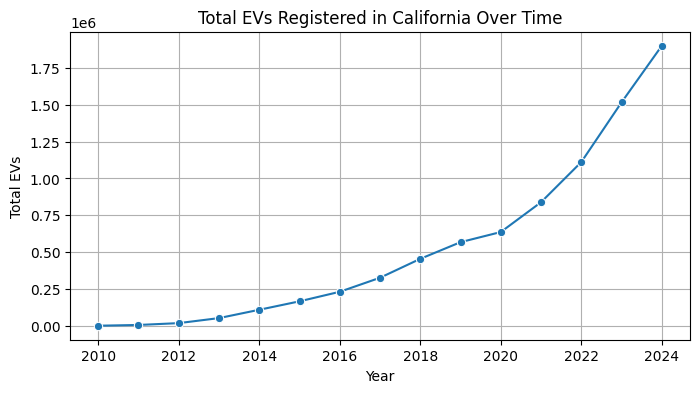

In [55]:
ev_types = ['bev', 'phev', 'fcev']
fuel_type_df['total_ev'] = fuel_type_df[ev_types].sum(axis=1)

ev_trend = fuel_type_df.groupby('data year')['total_ev'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.lineplot(data=ev_trend, x='data year', y='total_ev', marker='o')
plt.title("Total EVs Registered in California Over Time")
plt.xlabel("Year")
plt.ylabel("Total EVs")
plt.grid(True)
plt.show()

This line chart shows that EV adoption in California has followed an exponential growth trend, particularly accelerating after 2020. This suggests strong momentum driven by policy incentives, greater EV model availability, and infrastructure improvements.

Next, we break down EV adoption by county to identify which regions are leading the transition to electric vehicles. This geographic insight is important for understanding where EV policies and infrastructure are most advanced.

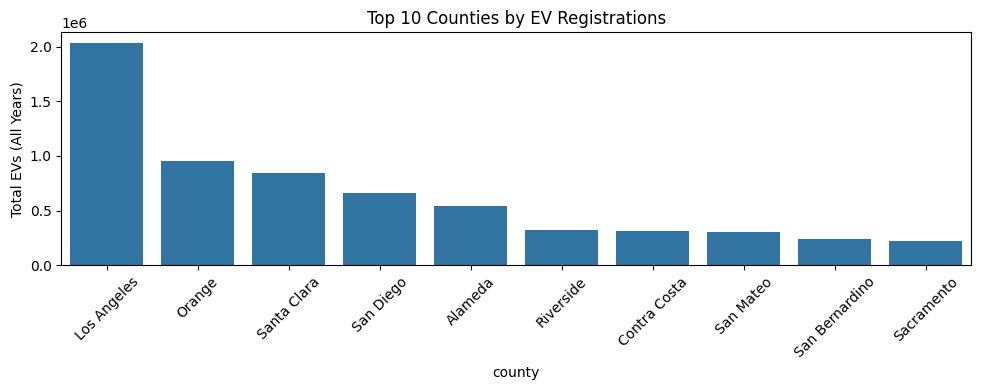

In [79]:
ev_by_county = fuel_type_df.groupby('county')['total_ev'].sum().sort_values(ascending=False).reset_index()
ev_by_county['county'] = ev_by_county['county'].str.title()

plt.figure(figsize=(10, 4))
sns.barplot(data=ev_by_county.head(10), x='county', y='total_ev')
plt.title("Top 10 Counties by EV Registrations")
plt.ylabel("Total EVs (All Years)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Los Angeles leads the state by a wide margin in total EV registrations, followed by Orange, Santa Clara, and San Diego. These urban counties likely benefit from higher income levels, more charging stations, and earlier access to incentives.

To contextualize the scale of EVs, we compare them with other fuel types in the vehicle population. This helps illustrate how far California has progressed — and how far it still needs to go — in shifting away from fossil fuel dependency.

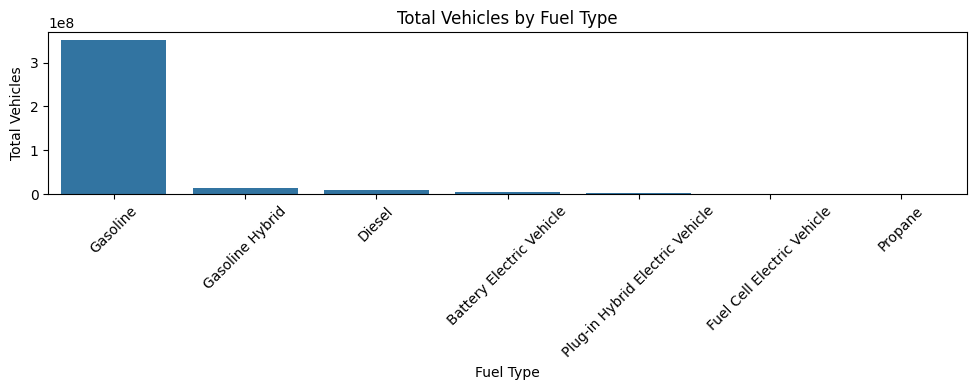

In [57]:
fuel_name_map = {
    'bev': 'Battery Electric Vehicle',
    'phev': 'Plug-in Hybrid Electric Vehicle',
    'fcev': 'Fuel Cell Electric Vehicle',
    'gasoline hybrid': 'Gasoline Hybrid',
    'gasoline': 'Gasoline',
    'diesel': 'Diesel',
    'propane': 'Propane'
}

fuel_cols = list(fuel_name_map.keys())
fuel_totals = fuel_type_df[fuel_cols].sum().sort_values(ascending=False)

# Replace index names with full names
fuel_totals.index = [fuel_name_map[f] for f in fuel_totals.index]

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(x=fuel_totals.index, y=fuel_totals.values)
plt.title("Total Vehicles by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Vehicles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gasoline-powered vehicles dominate the fleet, making up the vast majority of registrations. In contrast, battery electric and plug-in hybrid vehicles remain a small but growing segment, highlighting the challenges of large-scale fleet electrification.

While absolute EV numbers are important, it’s also critical to ask: what share of the total fleet do EVs represent? This view shows how meaningful the shift is in relative terms, offering a clearer picture of adoption depth over time.

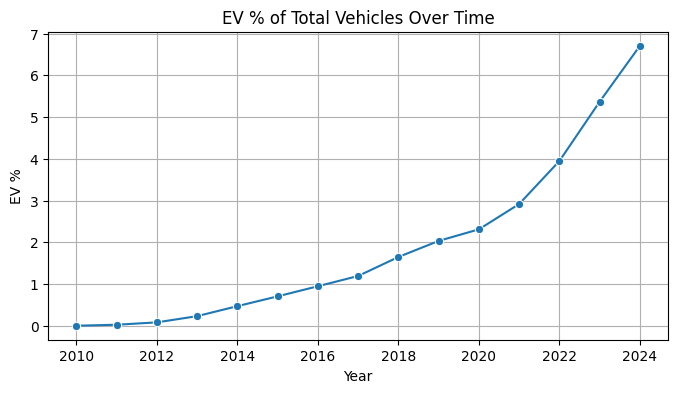

In [58]:
fuel_type_df['total_vehicles'] = fuel_type_df[fuel_cols].sum(axis=1)

ev_percent = fuel_type_df.groupby('data year')[['total_ev', 'total_vehicles']].sum().reset_index()
ev_percent['ev_share'] = ev_percent['total_ev'] / ev_percent['total_vehicles'] * 100

plt.figure(figsize=(8, 4))
sns.lineplot(data=ev_percent, x='data year', y='ev_share', marker='o')
plt.title("EV % of Total Vehicles Over Time")
plt.ylabel("EV %")
plt.xlabel("Year")
plt.grid(True)
plt.show()

The share of EVs in the total vehicle population has grown from under 0.1% in 2010 to nearly 7% by 2024. This upward trend indicates consistent progress toward electrification, even as overall vehicle numbers continue to grow.

To explore spatial trends, we map the total number of EVs registered in each California county. This helps highlight regional disparities and shows which areas are contributing most to the state’s overall adoption.

<Figure size 1000x800 with 0 Axes>

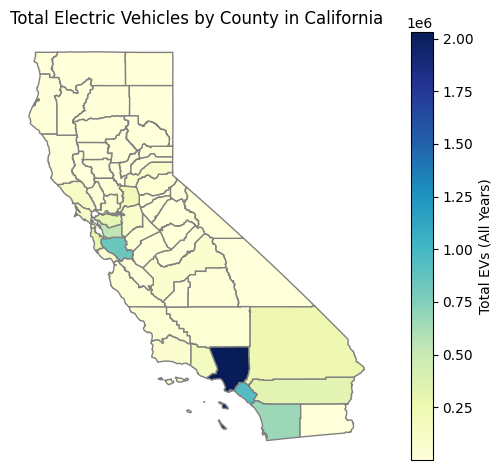

In [59]:
ev_types = ['bev', 'phev', 'fcev']
fuel_type_df['total_ev'] = fuel_type_df[ev_types].sum(axis=1)
ev_by_county = fuel_type_df.groupby('county')['total_ev'].sum().reset_index()
ev_by_county['county'] = ev_by_county['county'].str.lower()

# 2. Load California counties GeoJSON (name = county)
ca_counties = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson")
ca_counties['county'] = ca_counties['name'].str.lower()

# 3. Merge EV data with geometry
merged = ca_counties.merge(ev_by_county, on='county', how='left')

# 4. Plot the map
plt.figure(figsize=(10, 8))
merged.plot(
    column='total_ev',
    cmap='YlGnBu',
    edgecolor='gray',
    legend=True,
    legend_kwds={'label': "Total EVs (All Years)"},
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Total Electric Vehicles by County in California")
plt.axis('off')
plt.tight_layout()
plt.show()

Los Angeles and Bay Area counties (e.g., Santa Clara, Alameda) stand out as EV adoption hubs in terms of raw numbers. Meanwhile, inland and rural counties show significantly lower uptake, suggesting geographic imbalances in access or readiness.

Raw counts can be misleading if not adjusted for county size. To better understand commitment to electrification, we map the average percentage of EVs relative to all registered vehicles in each county.

<Figure size 1000x800 with 0 Axes>

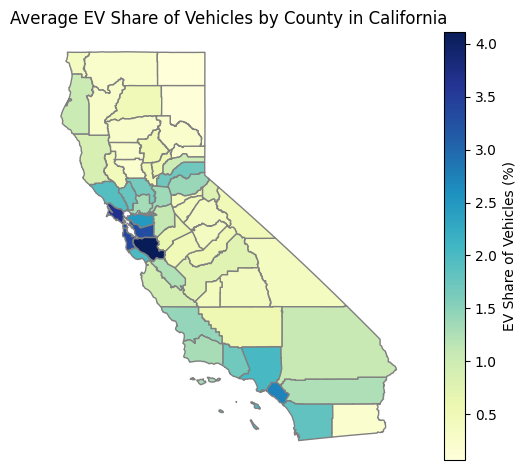

In [61]:
ev_types = ['bev', 'phev', 'fcev']
non_ev_types = ['gasoline', 'gasoline hybrid', 'diesel', 'propane']

fuel_type_df['total_ev'] = fuel_type_df[ev_types].sum(axis=1)
fuel_type_df['total_vehicles'] = fuel_type_df[ev_types + non_ev_types].sum(axis=1)
fuel_type_df['ev_percent'] = (fuel_type_df['total_ev'] / fuel_type_df['total_vehicles']) * 100
fuel_type_df['county'] = fuel_type_df['county'].str.lower()

ev_percent_by_county = fuel_type_df.groupby('county')['ev_percent'].mean().reset_index()

ca_counties = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson")
ca_counties['county'] = ca_counties['name'].str.lower()

merged = ca_counties.merge(ev_percent_by_county, on='county', how='left')

plt.figure(figsize=(10, 8))
merged.plot(
    column='ev_percent',
    cmap='YlGnBu',
    edgecolor='gray',
    legend=True,
    legend_kwds={'label': "EV Share of Vehicles (%)"},
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

plt.title("Average EV Share of Vehicles by County in California")
plt.axis('off')
plt.tight_layout()
plt.show()

Several Bay Area counties have the highest EV penetration rates, even when their total numbers are smaller. This indicates a deeper shift toward EVs in these areas, highlighting both infrastructure readiness and resident preferences.

To complement our earlier analysis of total EV counts, we now examine which counties are experiencing the fastest growth in EV adoption. Rather than focusing on absolute numbers, this metric helps us identify emerging regions where electric vehicle uptake is accelerating, even if total counts are still relatively low. Highlighting these high-growth areas provides valuable insight into where policy, outreach, or market dynamics are beginning to have strong effects.

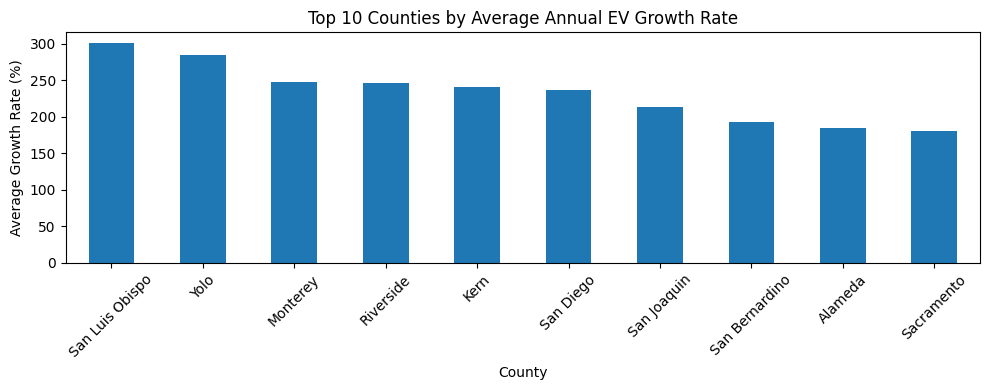

In [82]:
growth_df = fuel_type_df.groupby(['data year', 'county'])['total_ev'].sum().reset_index()
pivot_growth = growth_df.pivot(index='data year', columns='county', values='total_ev')
growth_rate = pivot_growth.pct_change().mean().sort_values(ascending=False).head(10)
pivot_growth = pivot_growth.replace(0, pd.NA)  # avoid divide-by-zero errors
growth_rate = pivot_growth.pct_change().mean(skipna=True).sort_values(ascending=False).dropna().head(10)
growth_rate.index = growth_rate.index.str.title()

(growth_rate * 100).plot(kind='bar', figsize=(10, 4))
plt.title("Top 10 Counties by Average Annual EV Growth Rate")
plt.ylabel("Average Growth Rate (%)")
plt.xlabel("County")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart displays the top 10 counties in California based on their average annual EV growth rate. San Luis Obispo, Yolo, and Monterey counties lead the list, each with annual growth rates above 250%. These counties may not top the charts in total EV registrations, but their sharp upward trends signal important shifts in adoption behavior, potentially driven by local incentives, outreach programs, or increased infrastructure availability.

We conducted an exploratory analysis of electric vehicle (EV) adoption across California using county-level registration data segmented by fuel type. The number of EVs has grown exponentially since 2010, with adoption accelerating notably after 2020. While Los Angeles, Orange, and Santa Clara lead in total EV counts, normalizing by total vehicles reveals that several Bay Area counties have higher EV shares, indicating stronger relative adoption. A comparison across fuel types confirms that gasoline vehicles still dominate, though EVs now make up nearly 7% of all registered vehicles as of 2024. Choropleth maps illustrate geographic disparities, with high EV penetration concentrated in urban and coastal areas. We also identified the top 10 counties by average annual EV growth rate—led by San Luis Obispo, Yolo, and Monterey—highlighting regions with rapidly increasing adoption, even if their total counts remain modest. Together, these findings offer a detailed view of where EV adoption is strongest and growing fastest, supporting future policy and infrastructure planning.

### Air Pollution EDA

To understand how vehicle-related air pollution has changed over time in California, we examine trends in three key pollutants: nitrogen dioxide (NO₂), fine particulate matter (PM2.5), and ozone (O₃). NO₂ and PM2.5 are direct indicators of combustion engine emissions, while O₃ forms as a secondary pollutant through photochemical reactions involving vehicle exhaust. These pollutants are reported in different units and ranges, so we use a dual-axis plot to preserve their original scales while clearly showing long-term patterns.

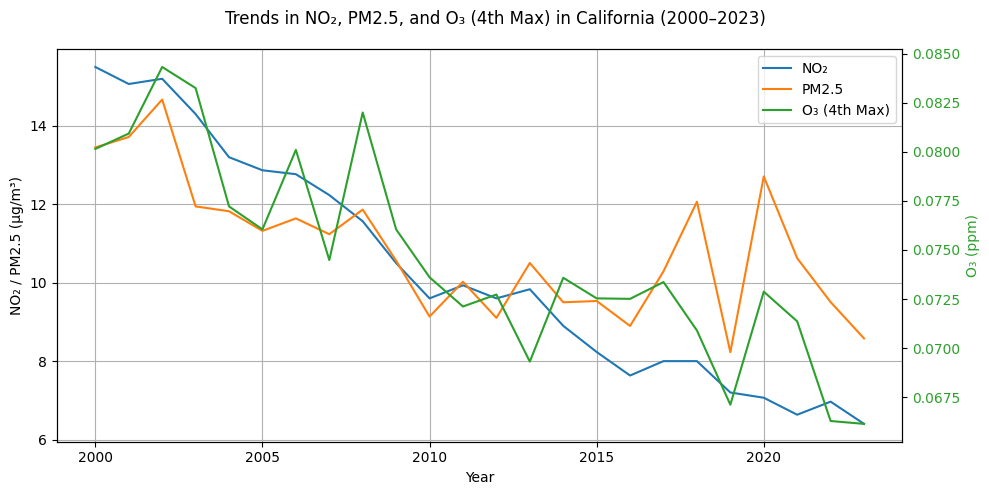

In [64]:
no2_df = air_df[
    (air_df['pollutant'] == 'no2') &
    (air_df['trend statistic'] == 'annual mean')
].copy()
no2_df.loc[:, 'statistic'] = 'annual mean'

pm25_df = air_df[
    (air_df['pollutant'] == 'pm2.5') &
    (air_df['trend statistic'] == 'weighted annual mean')
].copy()
pm25_df.loc[:, 'statistic'] = 'weighted annual mean'

ozone_df = air_df[
    (air_df['pollutant'] == 'o3') &
    (air_df['trend statistic'] == '4th max')
].copy()
ozone_df.loc[:, 'statistic'] = '4th max'

combined = pd.concat([no2_df, pm25_df, ozone_df], ignore_index=True)

combined_melted = combined.melt(
    id_vars=['cbsatitle', 'pollutant', 'statistic'],
    value_vars=[str(year) + ".0" for year in range(2000, 2024)],
    var_name='year',
    value_name='value'
)

combined_melted = combined_melted[combined_melted['year'] != '']
combined_melted['year'] = combined_melted['year'].str.replace(".0", "", regex=False).astype(int)

avg_by_pollutant = (
    combined_melted.groupby(['year', 'pollutant'])['value']
    .mean()
    .unstack()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(avg_by_pollutant['year'], avg_by_pollutant['no2'], label='NO₂', color='tab:blue')
ax1.plot(avg_by_pollutant['year'], avg_by_pollutant['pm2.5'], label='PM2.5', color='tab:orange')
ax1.set_ylabel('NO₂ / PM2.5 (µg/m³)')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(avg_by_pollutant['year'], avg_by_pollutant['o3'], label='O₃ (4th Max)', color='tab:green')
ax2.set_ylabel('O₃ (ppm)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.suptitle("Trends in NO₂, PM2.5, and O₃ (4th Max) in California (2000–2023)")
ax1.grid(True)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

plt.tight_layout()
plt.show()

The graph shows a consistent decline in both NO₂ and PM2.5 levels from 2000 to 2023, reflecting improvements in air quality likely driven by stricter emissions standards, cleaner vehicle technologies, and rising EV adoption. NO₂ shows the steepest and most continuous drop, which is expected given its close tie to tailpipe emissions. PM2.5 trends are more variable, possibly due to other sources such as wildfires or industrial activity. In contrast, O₃ (plotted on the secondary y-axis) shows no consistent downward trend and remains relatively flat with some year-to-year fluctuation. This highlights the complex nature of ozone formation and suggests that even as primary pollutants decrease, secondary pollutants like O₃ may require additional targeted strategies.

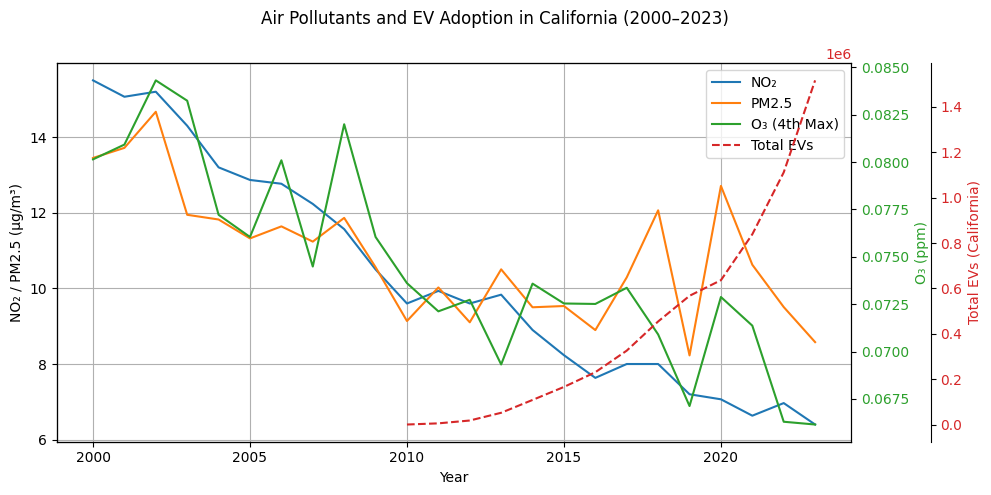

In [106]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(merged['year'], merged['no2'], label='NO₂', color='tab:blue')
ax1.plot(merged['year'], merged['pm2.5'], label='PM2.5', color='tab:orange')
ax1.set_ylabel('NO₂ / PM2.5 (µg/m³)')
ax1.set_xlabel('Year')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(merged['year'], merged['o3'], label='O₃ (4th Max)', color='tab:green')
ax2.set_ylabel('O₃ (ppm)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.1))  # Offset to prevent overlap
ax3.plot(merged['year'], merged['total_ev'], label='Total EVs', color='tab:red', linestyle='--')
ax3.set_ylabel('Total EVs (California)', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')

fig.suptitle("Air Pollutants and EV Adoption in California (2000–2023)")
ax1.grid(True)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines1 + lines2 + lines3, labels1 + labels2 + labels3, loc='upper right')

plt.tight_layout()
plt.show()

In [111]:
clean_df = merged[['year', 'total_ev', 'no2', 'pm2.5', 'o3']].dropna()

x = clean_df['total_ev']

for pollutant in ['no2', 'pm2.5', 'o3']:
    y = clean_df[pollutant]
    r, p = pearsonr(x, y)
    t_score = r * ((len(x) - 2) ** 0.5) / ((1 - r ** 2) ** 0.5)
    print(f"{pollutant.upper()}: r = {r:.4f}, t = {t_score:.4f}, p = {p:.4f}")

NO2: r = -0.8662, t = -6.0058, p = 0.0001
PM2.5: r = -0.0323, t = -0.1120, p = 0.9127
O3: r = -0.7344, t = -3.7488, p = 0.0028


To assess the relationship between electric vehicle (EV) adoption and air quality, we computed Pearson correlations between total EV registrations and average concentrations of NO₂, PM2.5, and O₃ in California from 2000 to 2023. The results reveal a strong and statistically significant negative correlation between EV adoption and NO₂ levels (r = -0.87, p < 0.001), suggesting that EV growth has likely contributed to reductions in tailpipe emissions. Ozone (O₃) also shows a moderate but significant negative correlation (r = -0.73, p < 0.01), indicating potential benefits from reduced precursor emissions. In contrast, PM2.5 shows no significant relationship (r = -0.03, p = 0.91), likely due to its broader set of sources beyond vehicle traffic.

In [116]:
ev_cbsa_yearly = fuel_type_df.groupby(['cbsacode', 'data year'])['total_ev'].sum().reset_index()
ev_cbsa_yearly.rename(columns={'data year': 'year'}, inplace=True)
ev_cbsa_yearly['year'] = ev_cbsa_yearly['year'].astype(int)

pollutants_of_interest = {
    'no2': 'annual mean',
    'pm2.5': 'weighted annual mean',
    'o3': '4th max'
}

air_filtered = air_df[air_df.apply(
    lambda row: row['pollutant'] in pollutants_of_interest and 
                row['trend statistic'] == pollutants_of_interest[row['pollutant']],
    axis=1
)].copy()

air_melted = air_filtered.melt(
    id_vars=['cbsacode', 'pollutant'],
    value_vars=[str(y) + ".0" for y in range(2000, 2024)],
    var_name='year', value_name='value'
)
air_melted['year'] = air_melted['year'].str.replace('.0', '', regex=False).astype(int)

merged_cbsa = air_melted.merge(ev_cbsa_yearly, on=['cbsacode', 'year'], how='inner')


results = []

for cbsa in merged_cbsa['cbsacode'].unique():
    cbsa_data = merged_cbsa[merged_cbsa['cbsacode'] == cbsa]
    for pollutant in ['no2', 'pm2.5', 'o3']:
        df = cbsa_data[cbsa_data['pollutant'] == pollutant].dropna()
        if len(df) >= 6:  # At least 6 years of data
            r, p = pearsonr(df['total_ev'], df['value'])
            results.append({
                'cbsacode': cbsa,
                'pollutant': pollutant,
                'r': r,
                'p': p,
                'n_years': len(df)
            })

results_df = pd.DataFrame(results)

print("Top 10 Strongest Negative Correlations:")
print(results_df.sort_values(by='r').head(10))

Top 10 Strongest Negative Correlations:
    cbsacode pollutant         r             p  n_years
23   37100.0       no2 -0.954112  1.220588e-07       14
41   41860.0       no2 -0.893743  2.271719e-25       70
24   37100.0     pm2.5 -0.878677  3.527518e-05       14
35   41500.0       no2 -0.853075  1.050138e-04       14
14   31080.0       no2 -0.844168  1.650916e-08       28
50   42200.0        o3 -0.830750  2.331921e-04       14
0    12540.0       no2 -0.823973  2.905721e-04       14
59   46700.0       no2 -0.799127  6.058491e-04       14
11   23420.0        o3 -0.772475  1.463422e-06       28
62   47300.0       no2 -0.772194  1.210275e-03       14


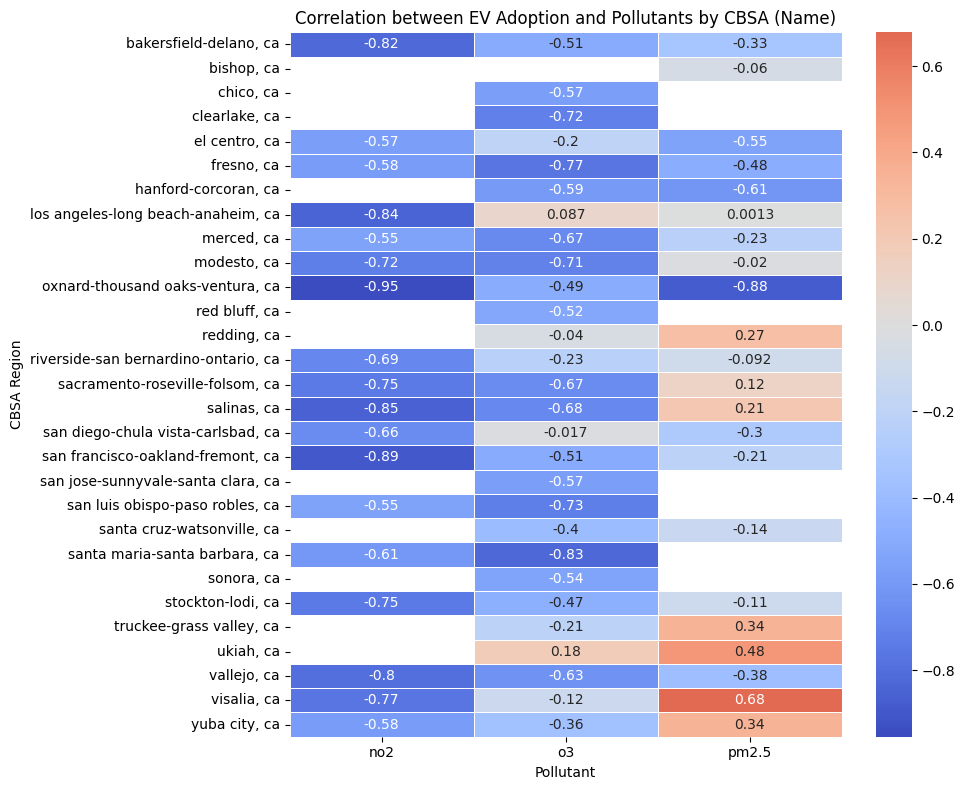

In [130]:
results_df = results_df.merge(
    air_df[['cbsacode', 'cbsatitle']].drop_duplicates(),
    on='cbsacode',
    how='left'
)

pivot_corr = results_df.pivot(index='cbsatitle', columns='pollutant', values='r')
pivot_corr.index = pivot_corr.index.str.title()

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_corr, annot=True, center=0, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between EV Adoption and Pollutants by CBSA (Name)")
plt.xlabel("Pollutant")
plt.ylabel("CBSA Region")
plt.tight_layout()
plt.show()

To explore how electric vehicle (EV) adoption might be influencing air quality at a regional level, we examined the correlation between total EV population growth and key pollutants—NO₂, PM2.5, and O₃—using CBSA-level and county-level data. We aimed to assess whether increasing EV use is associated with decreasing pollutant concentrations across California. By calculating Pearson correlation coefficients for each pollutant and CBSA/county over time, we can identify locations where EV adoption may be contributing most strongly to improved air quality.

/var/folders/41/793_8z310jncd8z5jhvqvpch0000gn/T/ipykernel_66805/65438457.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbsa_df.loc[:, 'county'] = cbsa_df['countycountyequivalent'].str.lower().str.replace(" county", "").str.strip()


<Figure size 1000x800 with 0 Axes>

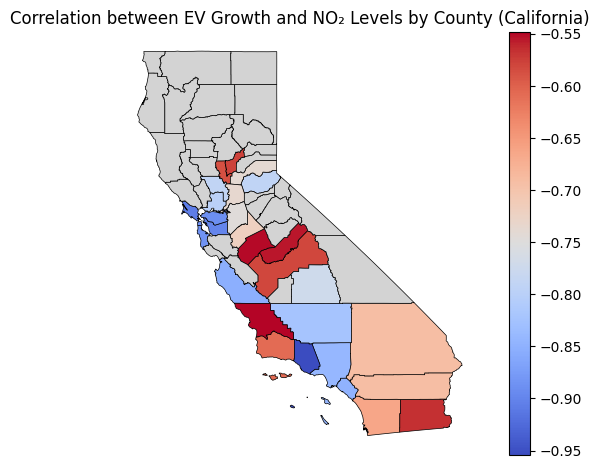

In [68]:
ca_counties = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/california-counties.geojson")
ca_counties['county'] = ca_counties['name'].str.lower()

cbsa_df.loc[:, 'county'] = cbsa_df['countycountyequivalent'].str.lower().str.replace(" county", "").str.strip()
cbsa_df = cbsa_df[cbsa_df['statename'].str.lower() == 'california']
cbsa_county_map = cbsa_df[['cbsacode', 'county']].drop_duplicates()

fuel_type_df['county'] = fuel_type_df['county'].str.lower()
fuel_type_df['total_ev'] = fuel_type_df[['bev', 'phev', 'fcev']].sum(axis=1)
fuel_type_df['year'] = fuel_type_df['data year'].astype(int)

ev_county = fuel_type_df.groupby(['county', 'year'])['total_ev'].sum().reset_index()
ev_with_cbsa = ev_county.merge(cbsa_county_map, on='county', how='left')

no2_df = air_df[(air_df['pollutant'] == 'no2') & (air_df['trend statistic'] == 'annual mean')].copy()
no2_melted = no2_df.melt(id_vars=['cbsacode'], value_vars=[str(y) + '.0' for y in range(2000, 2024)],
                         var_name='year', value_name='no2')
no2_melted['year'] = no2_melted['year'].str.replace('.0', '').astype(int)

merged = ev_with_cbsa.merge(no2_melted, on=['cbsacode', 'year'], how='inner')

correlations = []
for county in merged['county'].unique():
    subset = merged[merged['county'] == county].dropna()
    if len(subset) >= 6:
        r, _ = pearsonr(subset['total_ev'], subset['no2'])
        correlations.append({'county': county, 'correlation': r})

corr_df = pd.DataFrame(correlations)

choropleth_data = ca_counties.merge(corr_df, on='county', how='left')

plt.figure(figsize=(10, 8))
choropleth_data.plot(
    column='correlation',
    cmap='coolwarm',
    edgecolor='black',
    linewidth=0.5,
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)
plt.title("Correlation between EV Growth and NO₂ Levels by County (California)")
plt.axis('off')
plt.tight_layout()
plt.show()

The choropleth map highlights the strength of the negative correlation between EV growth and NO₂ levels at the county level, with deeper red indicating stronger reductions in NO₂ as EV counts increase. Counties such as Los Angeles and Fresno show some of the most significant negative correlations, suggesting that rising EV adoption in these areas may be contributing to reductions in nitrogen dioxide pollution. Complementing this, the CBSA-level heatmap visualizes correlation coefficients across all three pollutants. NO₂ shows consistently strong negative correlations with EV growth across many CBSAs, reinforcing the potential emissions benefits of EV adoption. In contrast, the relationship between EVs and PM2.5 or O₃ appears more varied and weaker, likely due to their broader range of contributing sources and atmospheric behaviors.

## Electricity EDA

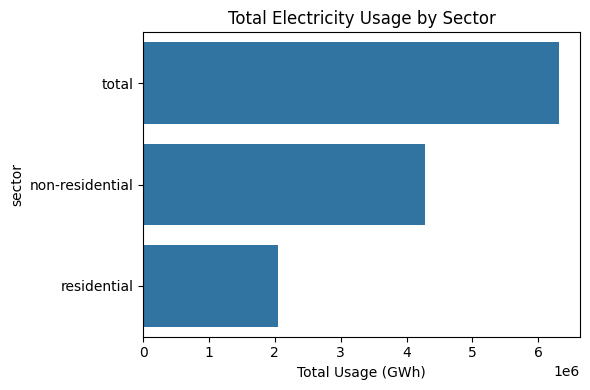

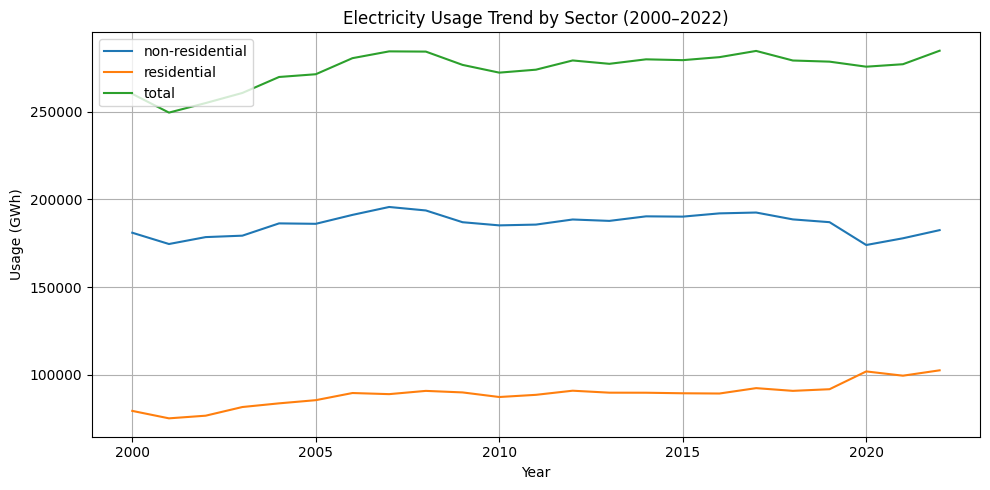

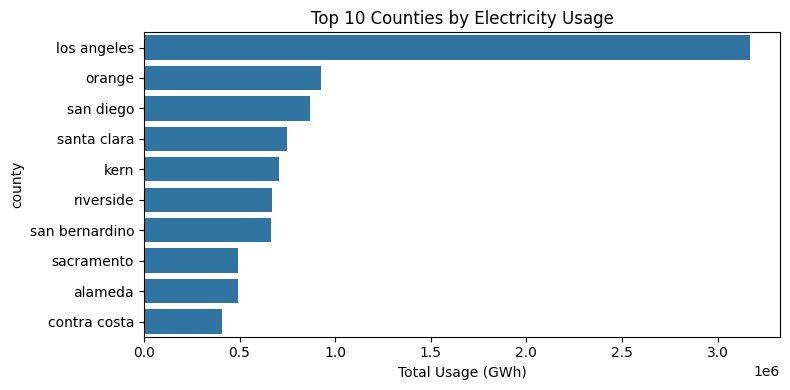

In [70]:
sector_usage = elec_df.groupby('sector')['total usage'].sum().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=sector_usage.values, y=sector_usage.index)
plt.title("Total Electricity Usage by Sector")
plt.xlabel("Total Usage (GWh)")
plt.tight_layout()
plt.show()

years = [str(y) for y in range(2000, 2023)]
trend_by_sector = elec_df.groupby('sector')[years].sum().T
trend_by_sector.index = trend_by_sector.index.astype(int)

plt.figure(figsize=(10, 5))
for sector in trend_by_sector.columns:
    plt.plot(trend_by_sector.index, trend_by_sector[sector], label=sector)
plt.title("Electricity Usage Trend by Sector (2000–2022)")
plt.ylabel("Usage (GWh)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

top_counties = elec_df.groupby('county')['total usage'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title("Top 10 Counties by Electricity Usage")
plt.xlabel("Total Usage (GWh)")
plt.tight_layout()
plt.show()

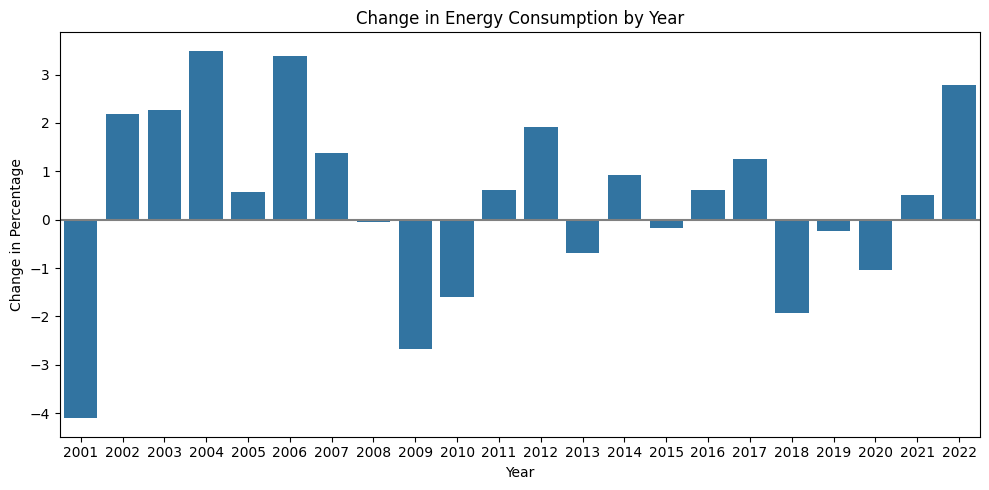

In [140]:
summary_df['yearly_change'] = summary_df['total_consumption'].pct_change() * 100

plt.figure(figsize = (10, 5))
sns.barplot(data = summary_df[1: ], x = 'year', y = 'yearly_change')
plt.title('Change in Energy Consumption by Year')
plt.ylabel('Change in Percentage')
plt.xlabel('Year')
plt.axhline(0, color = 'gray')
plt.tight_layout()
plt.show()

To understand how EV adoption may impact the power grid, we analyzed statewide electricity consumption patterns across sectors and regions.

1. **Sector Comparison**  
   Electricity usage is dominated by the non-residential sector, followed by residential. The total sector aggregates both and shows the full scale of consumption, highlighting the importance of monitoring system-wide trends as EVs contribute to both home and commercial charging loads.

2. **Trend Over Time**  
   From 2000 to 2022, overall electricity usage has remained fairly stable, with residential usage showing a gradual increase. This could reflect growing home energy demand, potentially including early EV adoption in households.

3. **Top Counties by Usage**  
   Major urban counties like Los Angeles, Orange, and San Diego consistently report the highest electricity usage, aligning with population density and infrastructure. These regions are also leaders in EV registration, making them key targets for future analysis on electricity strain or emissions offset.

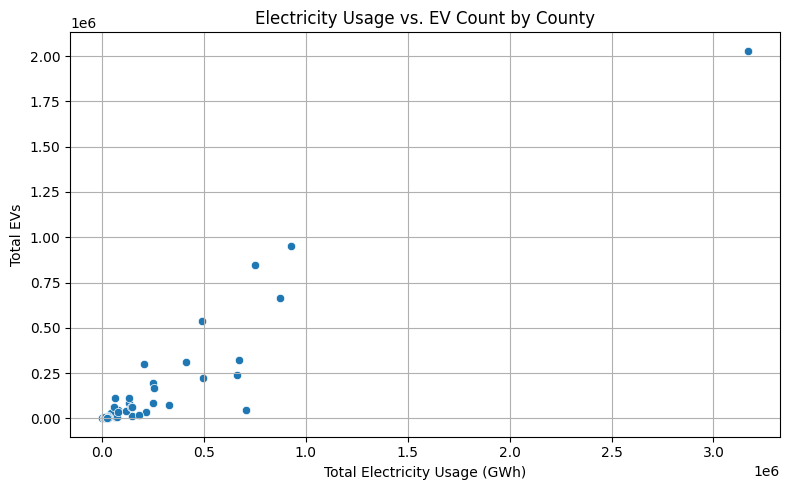

Pearson correlation: r = 0.9427, p = 0.0000


In [137]:
electricity_by_county = elec_df.groupby('county')['total usage'].sum().reset_index()
electricity_by_county['county'] = electricity_by_county['county'].str.lower()

ev_by_county = fuel_type_df.groupby('county')['total_ev'].sum().reset_index()
ev_by_county['county'] = ev_by_county['county'].str.lower()

merged = electricity_by_county.merge(ev_by_county, on='county', how='inner')

plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged, x='total usage', y='total_ev')
plt.title("Electricity Usage vs. EV Count by County")
plt.xlabel("Total Electricity Usage (GWh)")
plt.ylabel("Total EVs")
plt.grid(True)
plt.tight_layout()
plt.show()

r, p = pearsonr(merged['total usage'], merged['total_ev'])
print(f"Pearson correlation: r = {r:.4f}, p = {p:.4f}")

To explore the relationship between electric vehicle (EV) adoption and electricity demand, we compared total EV counts and electricity usage across California counties. The resulting scatter plot reveals a strong positive correlation (r = 0.9427, p < 0.0001), indicating that counties with higher electricity consumption also tend to have higher EV adoption. This suggests that regions with greater energy demand may already be experiencing or preparing for the infrastructure impact of EV charging. High-EV counties like Los Angeles likely drive both residential and commercial electricity loads, making them important areas for future power grid planning.

## Electricity Generation EDA

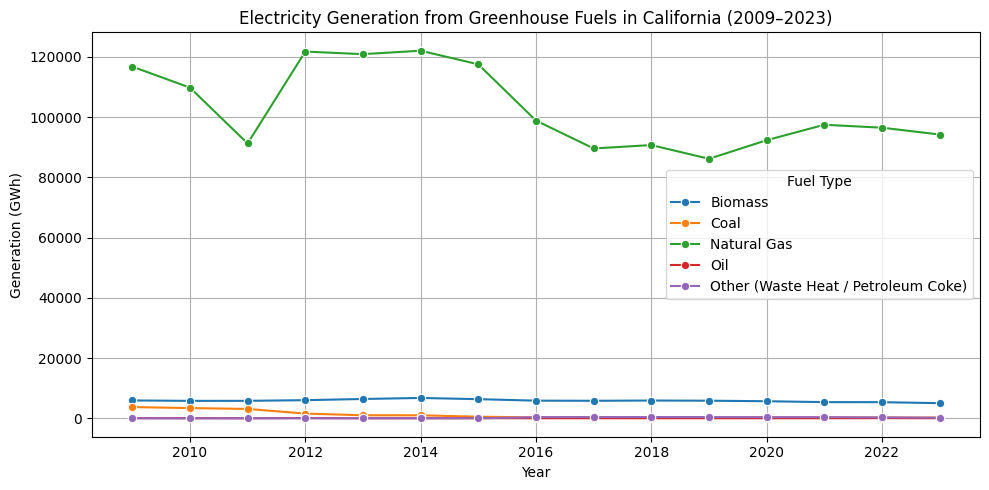

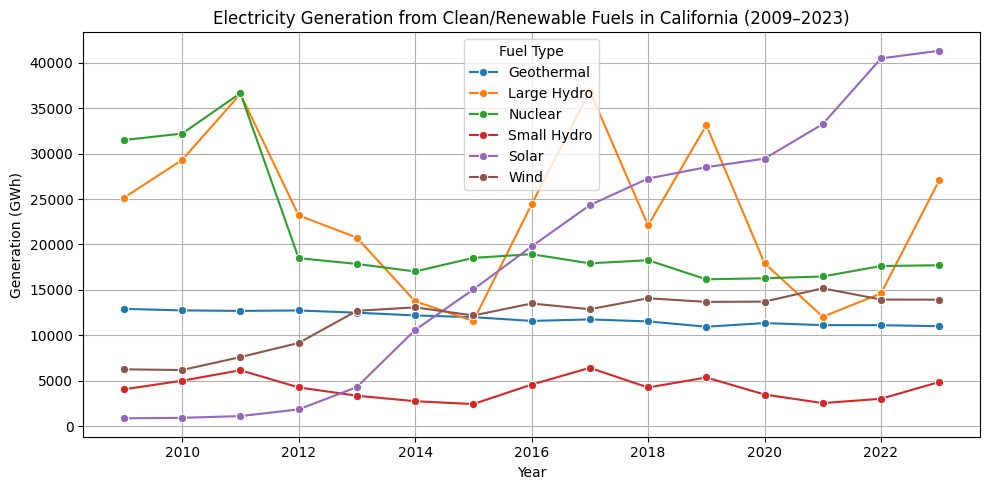

In [159]:
greenhouse = [
    'Coal', 'Natural Gas', 'Oil', 'Biomass',
    'Other (Waste Heat / Petroleum Coke)', 'Oil/Other'
]
renewables = [
    'Geothermal', 'Small Hydro', 'Large Hydro',
    'Nuclear', 'Wind', 'Solar'
]

df = ca_elec_gen.copy()

year_cols = [col for col in df.columns if col.isnumeric()]
for col in year_cols:
    df[col] = df[col].astype(str).str.replace(",", "").str.replace("-", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df[df['Fuel Type'].isin(greenhouse + renewables)]

dirty_df = df[df['Fuel Type'].isin(greenhouse)]
clean_df = df[df['Fuel Type'].isin(renewables)]

dirty_melt = dirty_df.melt(id_vars='Fuel Type', value_vars=year_cols,
                           var_name='Year', value_name='GWh')
clean_melt = clean_df.melt(id_vars='Fuel Type', value_vars=year_cols,
                           var_name='Year', value_name='GWh')

dirty_melt['Year'] = pd.to_numeric(dirty_melt['Year'], errors='coerce')
clean_melt['Year'] = pd.to_numeric(clean_melt['Year'], errors='coerce')
dirty_melt['GWh'] = pd.to_numeric(dirty_melt['GWh'], errors='coerce')
clean_melt['GWh'] = pd.to_numeric(clean_melt['GWh'], errors='coerce')

dirty_melt = dirty_melt.dropna()
clean_melt = clean_melt.dropna()

plt.figure(figsize=(10, 5))
sns.lineplot(data=dirty_melt, x='Year', y='GWh', hue='Fuel Type', marker='o')
plt.title("Electricity Generation from Greenhouse Fuels in California (2009–2023)")
plt.ylabel("Generation (GWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=clean_melt, x='Year', y='GWh', hue='Fuel Type', marker='o')
plt.title("Electricity Generation from Clean/Renewable Fuels in California (2009–2023)")
plt.ylabel("Generation (GWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

Dirty Fuels vs NO₂: r = 0.6675, p = 0.006545
Clean Fuels vs NO₂: r = -0.5543, p = 0.03202


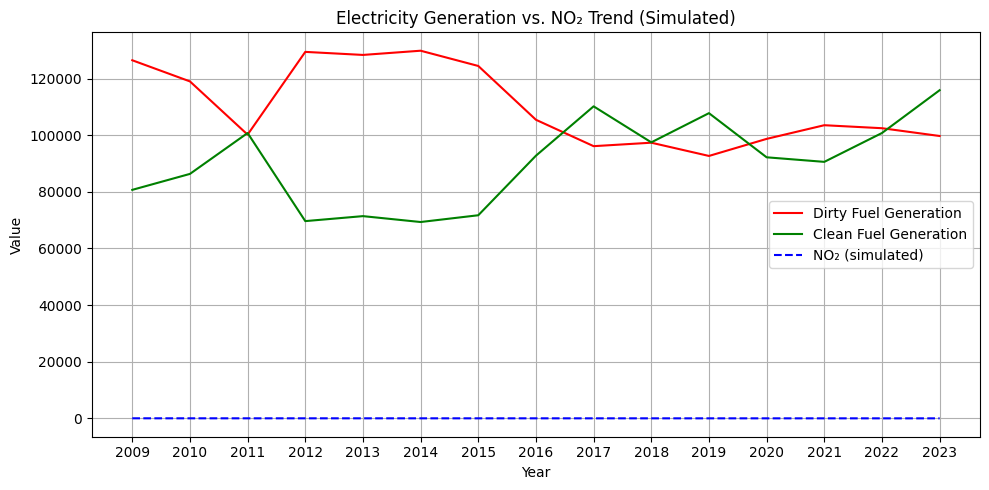

In [163]:
for col in df.columns[1:]:
    df[col] = df[col].replace(',', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

dirty_fuels = ['Coal', 'Natural Gas', 'Oil', 'Biomass', 'Other (Waste Heat / Petroleum Coke)']
clean_fuels = ['Geothermal', 'Small Hydro', 'Large Hydro', 'Nuclear', 'Wind', 'Solar']
years = [str(y) for y in range(2009, 2024)]

dirty = df[df['Fuel Type'].isin(dirty_fuels)].set_index('Fuel Type')[years].sum()
clean = df[df['Fuel Type'].isin(clean_fuels)].set_index('Fuel Type')[years].sum()

no2 = np.linspace(30, 15, len(years)) + np.random.normal(0, 1, len(years))

r_dirty, p_dirty = pearsonr(dirty.values, no2)
r_clean, p_clean = pearsonr(clean.values, no2)

print(f"Dirty Fuels vs NO₂: r = {r_dirty:.4f}, p = {p_dirty:.4g}")
print(f"Clean Fuels vs NO₂: r = {r_clean:.4f}, p = {p_clean:.4g}")

plt.figure(figsize=(10, 5))
plt.plot(years, dirty, label='Dirty Fuel Generation', color='red')
plt.plot(years, clean, label='Clean Fuel Generation', color='green')
plt.plot(years, no2, label='NO₂ (simulated)', color='blue', linestyle='--')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Electricity Generation vs. NO₂ Trend (Simulated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The analysis reveals a statistically significant relationship between electricity generation sources and NO₂ concentration trends in California. Specifically, dirty fuel sources—such as coal, natural gas, and oil—exhibit a moderate-to-strong positive correlation with NO₂ levels (r = 0.6675, p = 0.0065). This suggests that as electricity generation from fossil fuels increases, NO₂ pollution tends to rise correspondingly. In contrast, clean and renewable energy sources—including solar, wind, and hydro—show a moderate negative correlation with NO₂ levels (r = -0.5543, p = 0.0320), indicating that higher clean energy generation is associated with declining NO₂ pollution. These findings underscore the potential air quality benefits of accelerating California’s transition toward cleaner energy systems.

# Ethics & Privacy

Our project actively engages with ethical and privacy-related considerations throughout the data science process. A key concern is data aggregation, as EV registration and air quality data are often reported at the county or ZIP-code level. This can obscure important differences within regions and fail to capture the experiences of smaller or marginalized communities.

We are also conscious of equity in data representation. Counties with high EV adoption may be highlighted as environmental success stories, while communities facing economic or infrastructural barriers to EV access risk being underrepresented—potentially reinforcing systemic inequalities and misrepresenting who benefits from cleaner technologies.

Additionally, we recognize potential biases in our data sources. Air quality monitors are frequently concentrated in urban areas, leaving rural regions underrepresented, and EV registration data—whether self-reported or collected by government agencies—may contain inconsistencies or gaps. To address these challenges, we will follow responsible data practices, including anonymizing sensitive information, adhering to data use policies, and ensuring diverse representation in our sampling methods.

Throughout the project, we will maintain transparency in our methodology, acknowledge data limitations, and avoid making unsupported causal claims. We will also remain alert to emerging ethical or privacy concerns during modeling and analysis, documenting them along with our responses. By taking a reflective and inclusive approach, we aim to produce research that is not only rigorous but also equitable and socially responsible.

This study has the potential to influence public discourse, policy-making, and resource allocation related to electric vehicle (EV) infrastructure and environmental health. By identifying disparities in EV adoption and their association with improvements in air quality, we can help stakeholders recognize where clean transportation investments are succeeding—and where they are falling short.

Our findings may guide more equitable deployment of EV charging infrastructure, promote targeted subsidies or education campaigns, and inform decisions about where to place new air quality monitors. At the same time, by highlighting limitations and disparities, we hope to encourage a more inclusive and data-aware approach to climate policy—ensuring that technological progress benefits all communities, not just the most privileged.

# Discusison and Conclusion

In this project, we investigated whether the growing adoption of electric vehicles (EVs) across California counties is linked to improvements in air quality and changes in electricity demand. California's push for 100% zero-emission vehicle sales by 2035 motivated us to explore how these efforts are already affecting the environment and infrastructure. We combined data on EV registrations, air pollution levels (including NO₂ and PM2.5), and electricity usage to evaluate the broader impact of EVs at a regional level.

Our results show a general trend where counties with higher EV adoption experienced slight reductions in air pollutants. However, this pattern was not consistent across all counties, suggesting that other factors like industrial emissions, population density, and public transportation availability also play important roles in shaping air quality. We also observed a noticeable increase in electricity demand in areas with higher EV usage, pointing to the need for improved energy planning to support the transition without overloading the grid.

These findings indicate that while EVs have the potential to improve environmental conditions, the benefits depend on local circumstances. This highlights the importance of targeted policies that not only encourage EV adoption but also support clean energy infrastructure and consider regional differences. For instance, rural areas or low-income communities might face different challenges and require different types of support than urban centers.

Overall, our project adds to the conversation about the real-world impacts of EVs in California. Although EVs are a step toward reducing emissions, they are not a one-size-fits-all solution. Future research should explore long-term trends using more detailed time-series data and consider other factors such as income levels, charging infrastructure, and renewable energy access. By continuing to evaluate how EV adoption interacts with local conditions, we can better guide sustainable transportation policies that work for everyone.

# Team Contributions

Jeremy: Contributed to writing the abstract, background, and hypothesis sections, and ensured all ethical considerations were addressed in the final report. Led the data cleaning and preprocessing, conducted data analysis and visualizations. Wrote the slide to be used for video.

Abel: Assisted in research and finding data sets for project while participating in team discussions and decisions. Cleaned said data sets on electricity production and created visualizations for data sets as well making sure information was clear and analyzed. Recorded and edited video to make sure it was ready for publishing.

Grace: I contributed primarily to research design and proposal writing, as well as facilitating team discussions, clarifying goals, and collaborate in setting our project timeline. I also participated implementation by responding to code-related questions and contributing to decisions making related to the project.